#  第三次作业

## https://github.com/zfy-zgnydx/Data-Mining

# Github Dataset

In [1]:
import numpy as np
import pandas as pd
filename = './datasets/github dataset/github_dataset.csv'
data = pd.read_csv(filename)

In [2]:
data.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


In [3]:
#频数
data['repositories'].value_counts()

kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: repositories, Length: 972, dtype: int64

In [4]:
#language频数
data['language'].value_counts() 

JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML                   1
ActionScript    

In [5]:
#5数概括
pd.DataFrame(data, columns=['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']).describe().loc[['mean', '25%', '50%', '75%', 'max']]

,stars_count,forks_count,issues_count,pull_requests,contributors
mean,81.976236,53.884981,8.656844,4.374525,8.364068
25%,1.000000,1.000000,1.000000,0.000000,0.000000
50%,12.000000,6.000000,2.000000,0.000000,2.000000
75%,65.250000,38.250000,6.000000,2.000000,4.000000
max,995.000000,973.000000,612.000000,567.000000,658.000000


In [6]:
#缺失值个数
pd.DataFrame(data.isna().sum(),columns=['NaN_counts']).T

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
NaN_counts,0,0,0,0,0,0,145


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<BarContainer object of 51 artists>

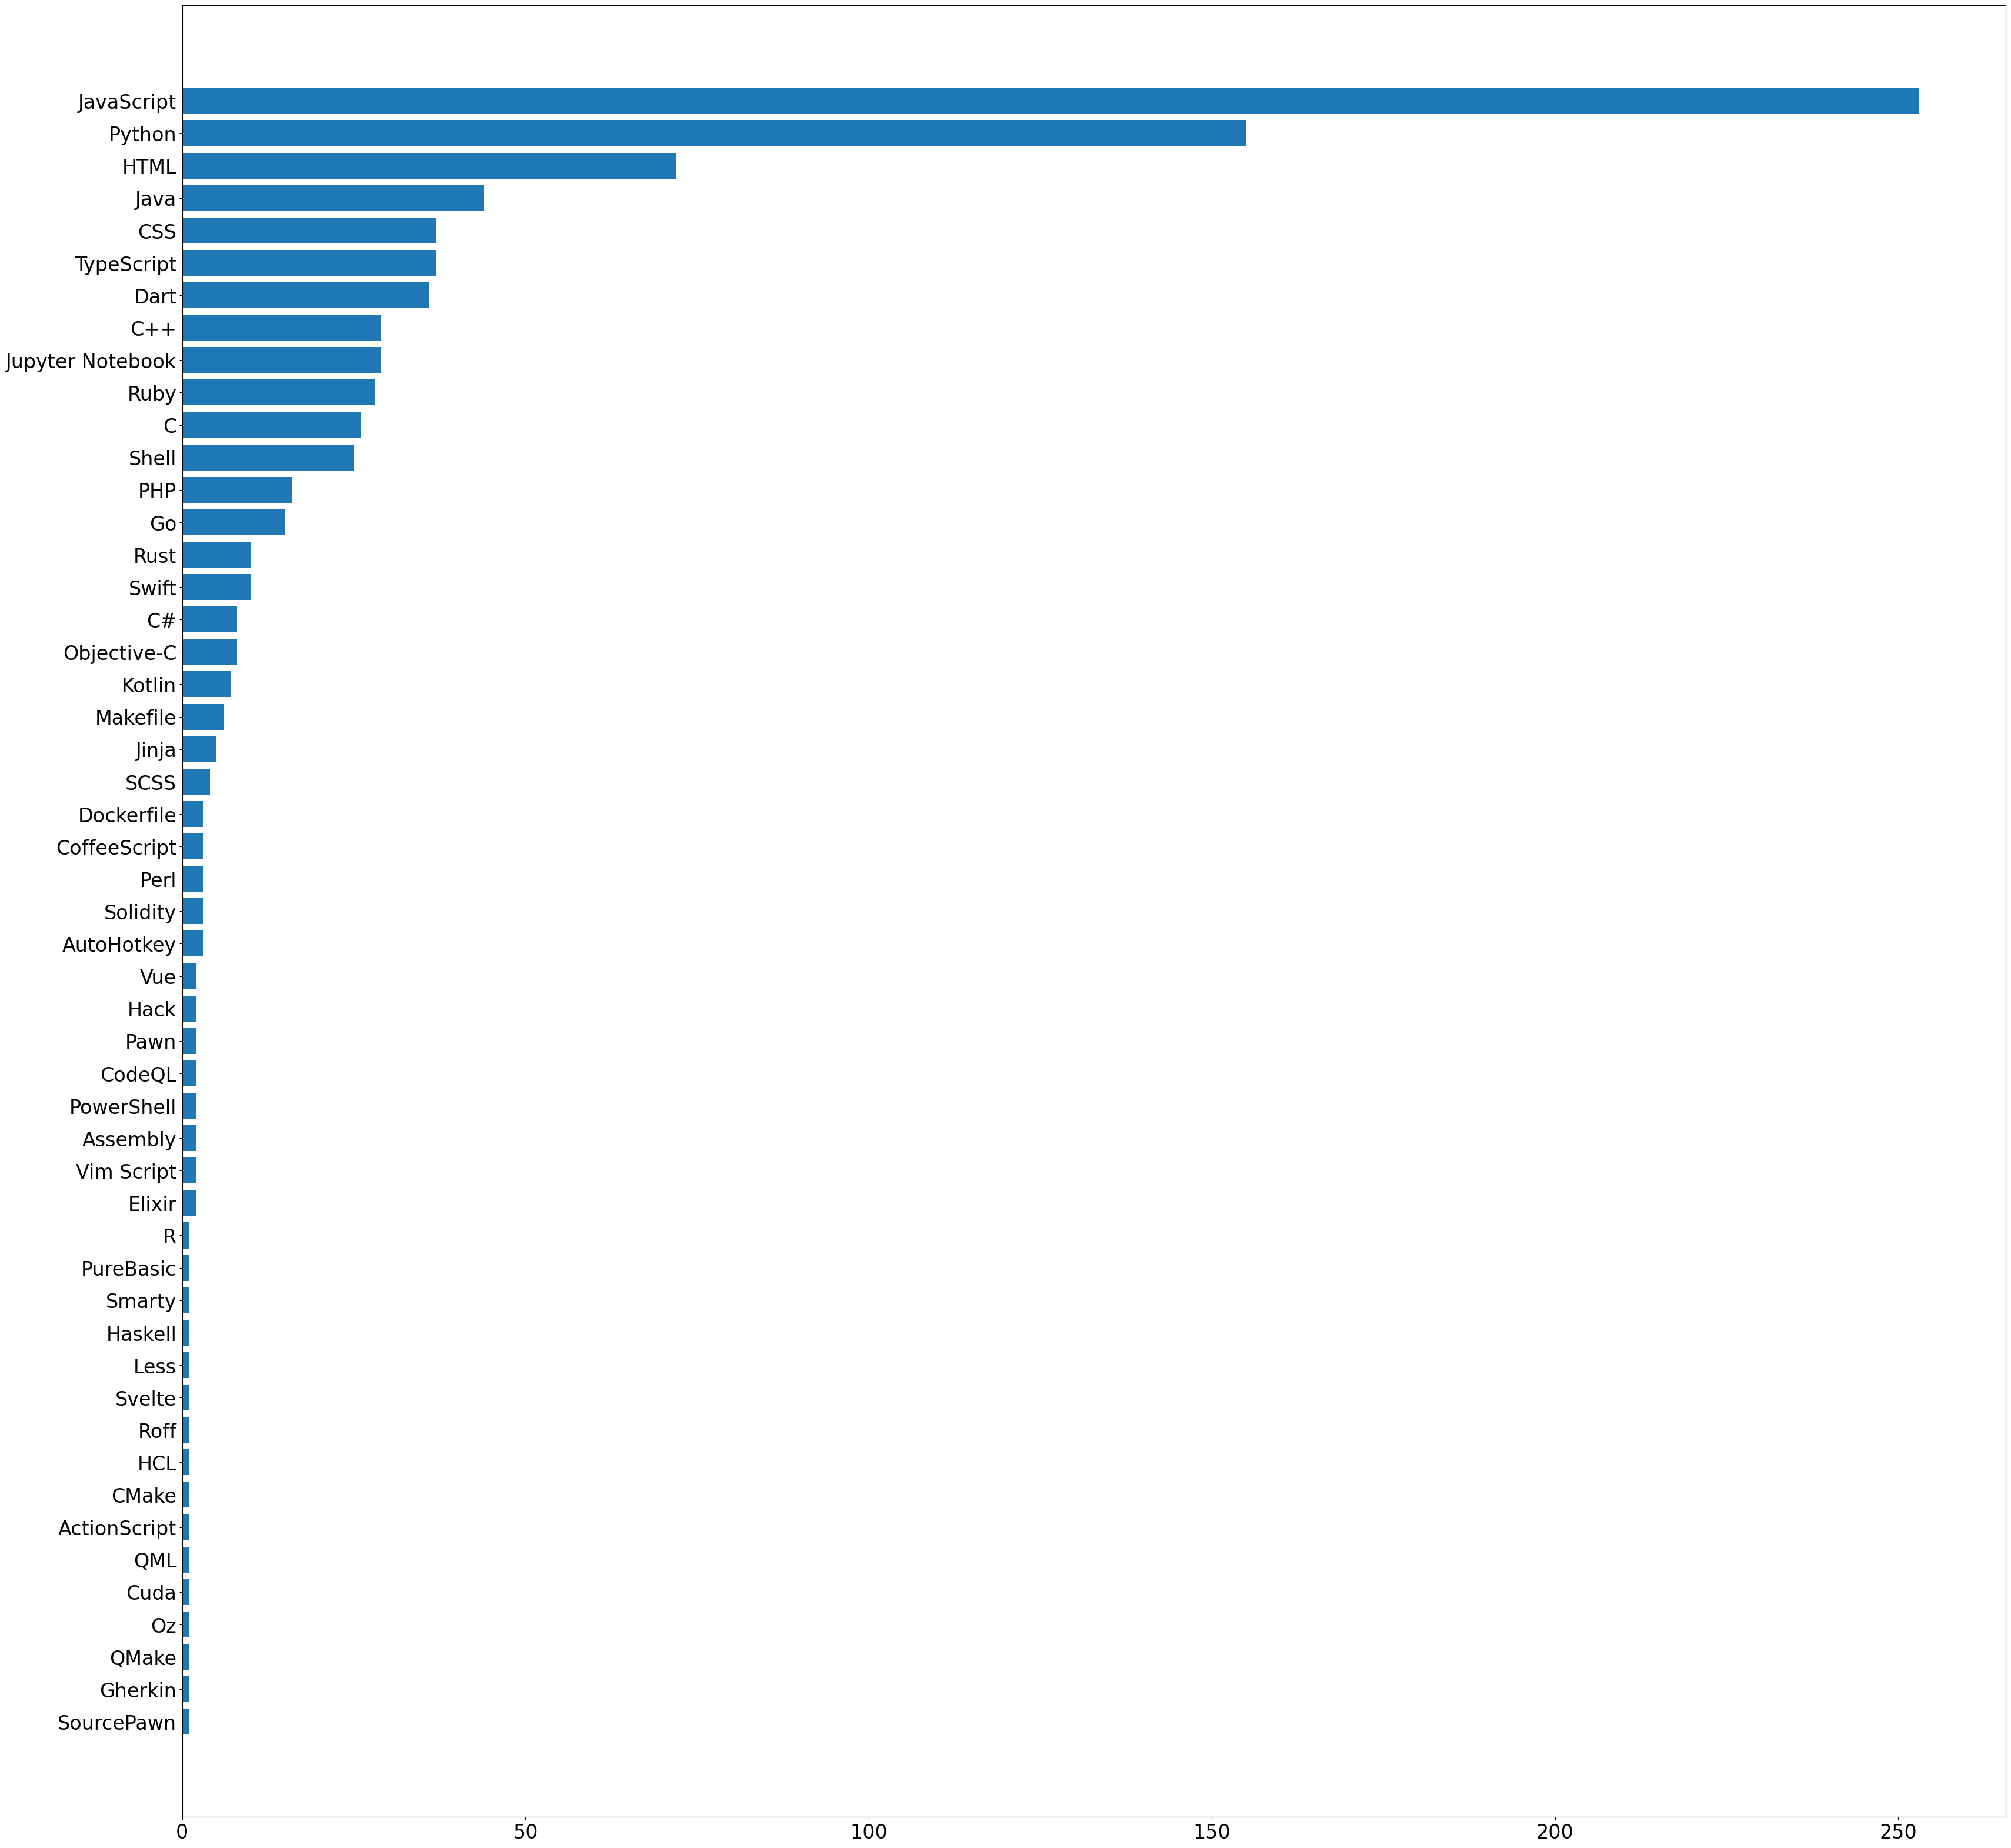

In [8]:
#language直方图
language_counts = pd.DataFrame(data['language'].value_counts()).sort_values(by='language', ascending=True).rename(columns={'language': 'language_count'})

plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(language_counts.index, width=language_counts['language_count'])

In [9]:
language_list = [np.nan]
encode_language_list = []
nan = np.nan
for language in data['language']:
    if language not in language_list:
        language_list.append(language)
    language = language_list.index(language)
encode_language_list.append(language)

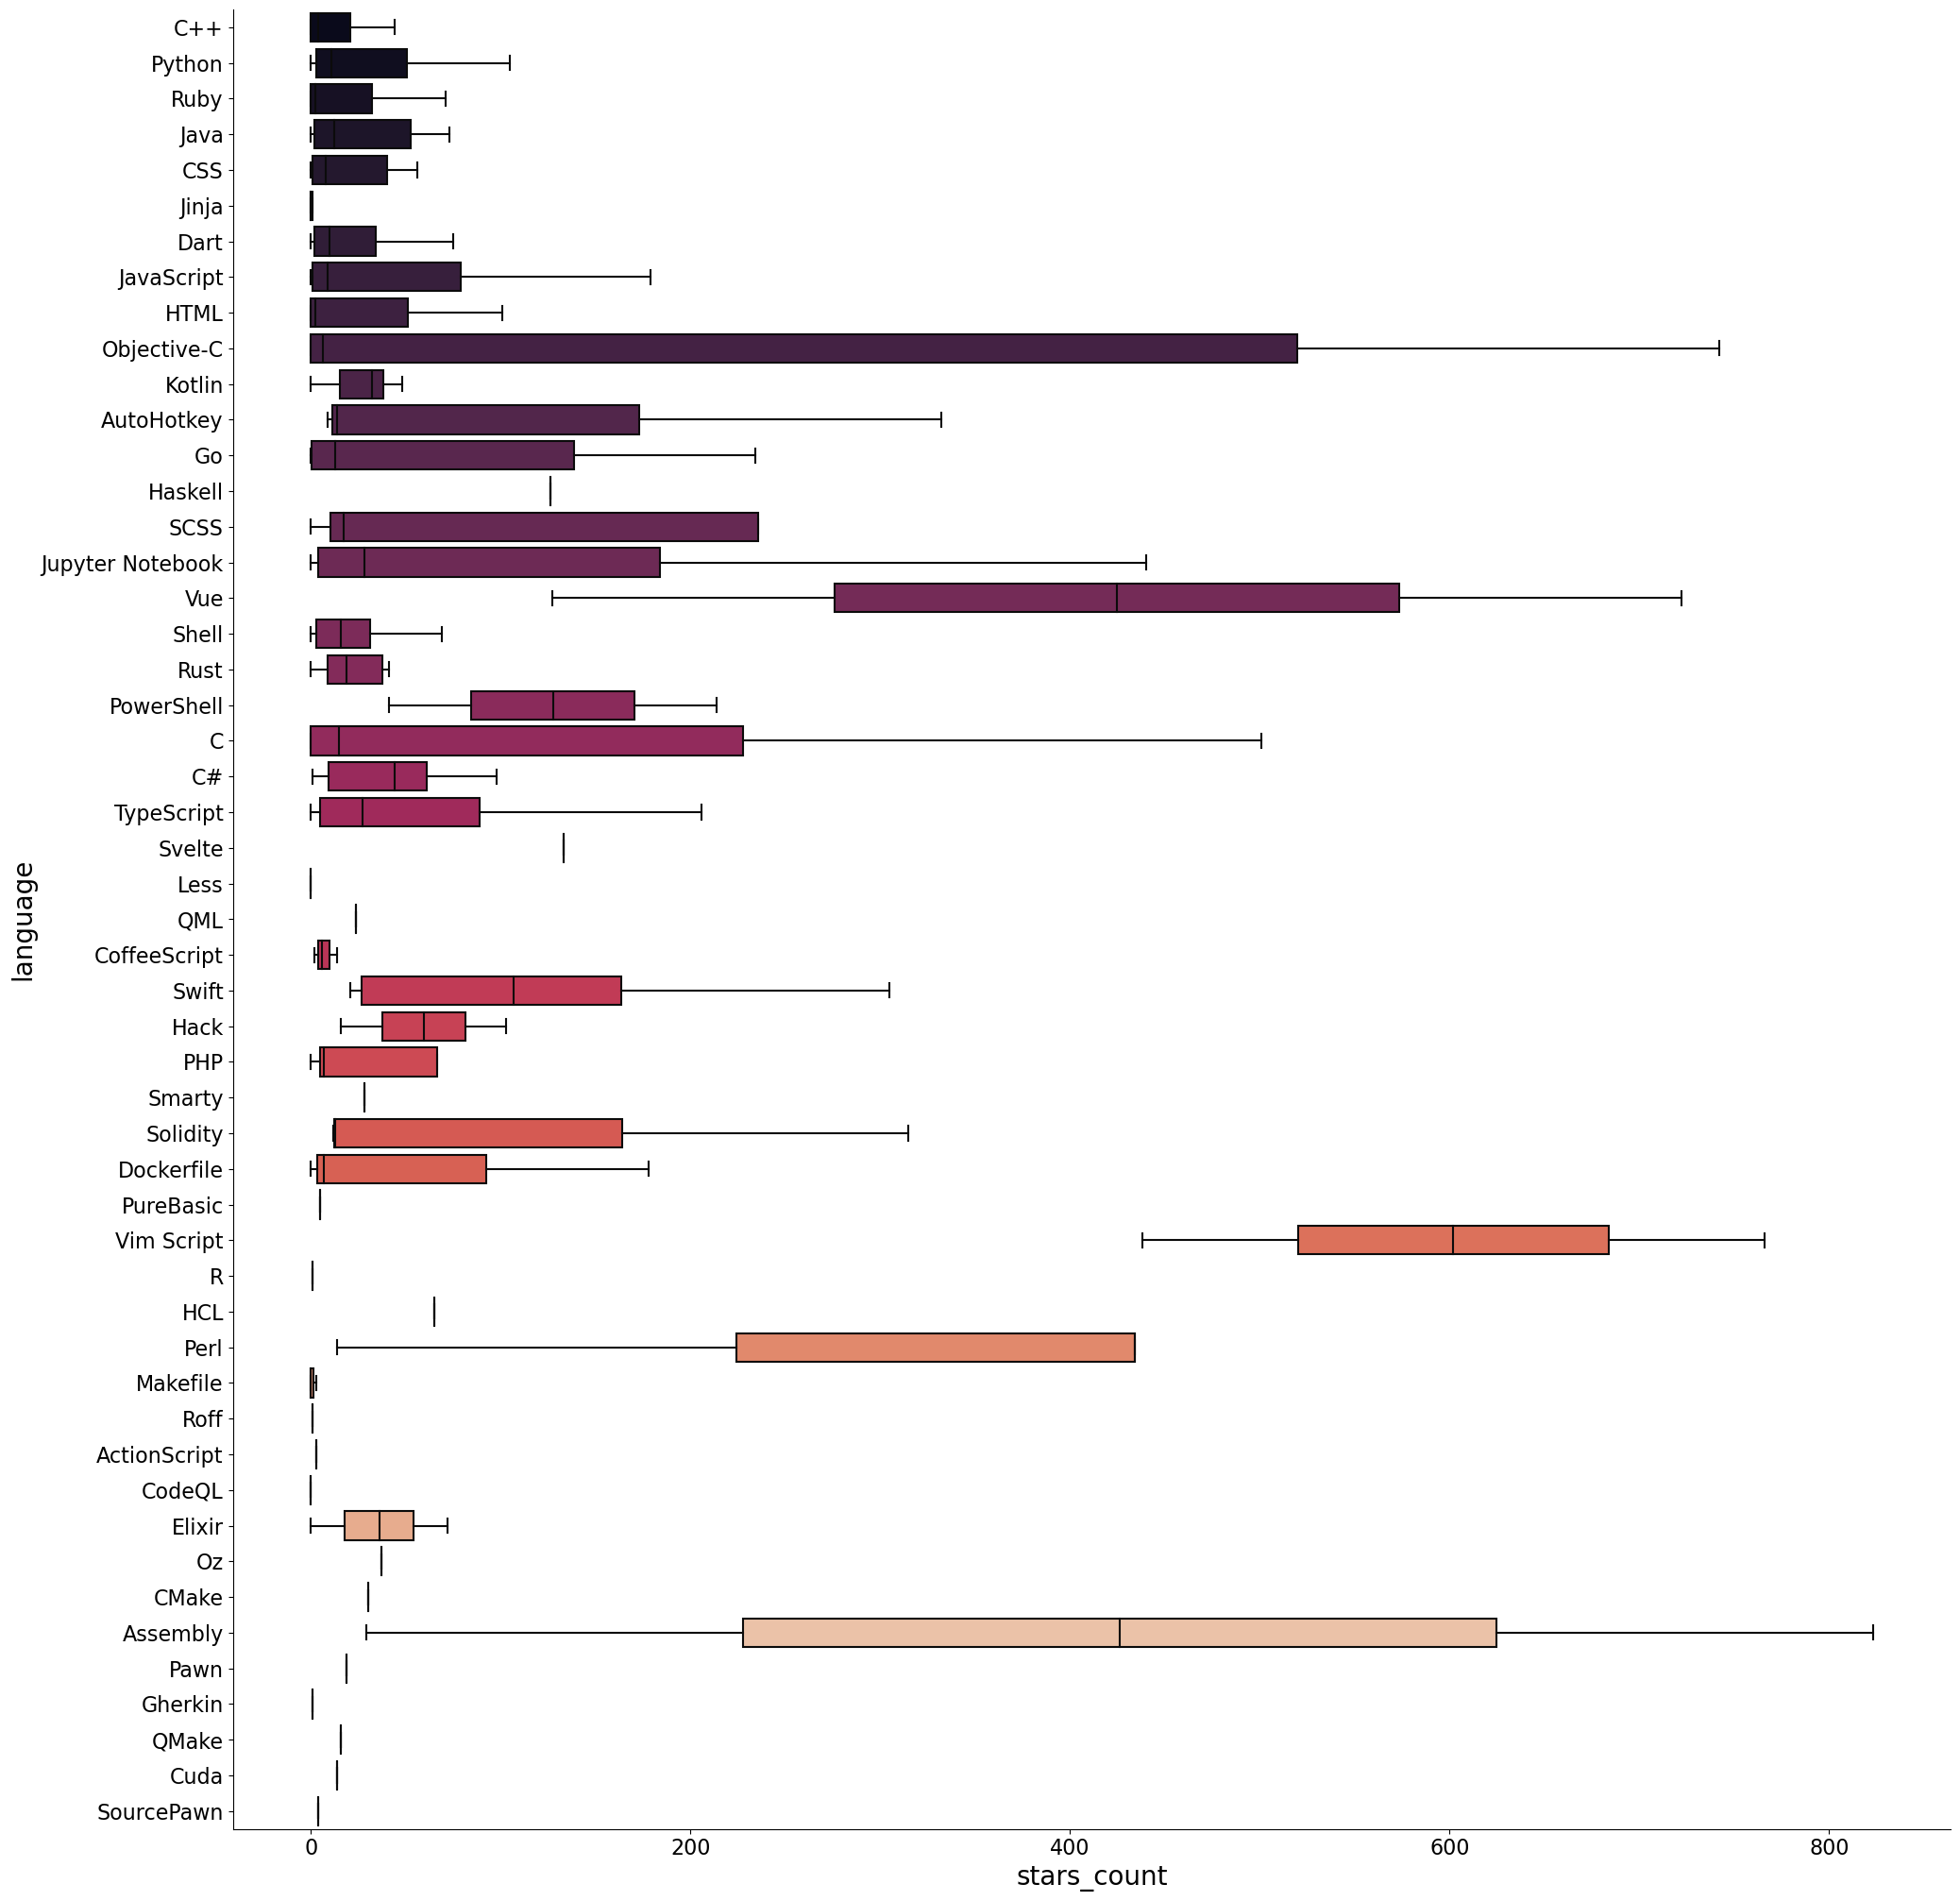

In [10]:
#stars_count箱型图
stars_count_box = sns.catplot(data=data, kind='box', y='language', x='stars_count', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('stars_count', fontsize=20)
plt.show()

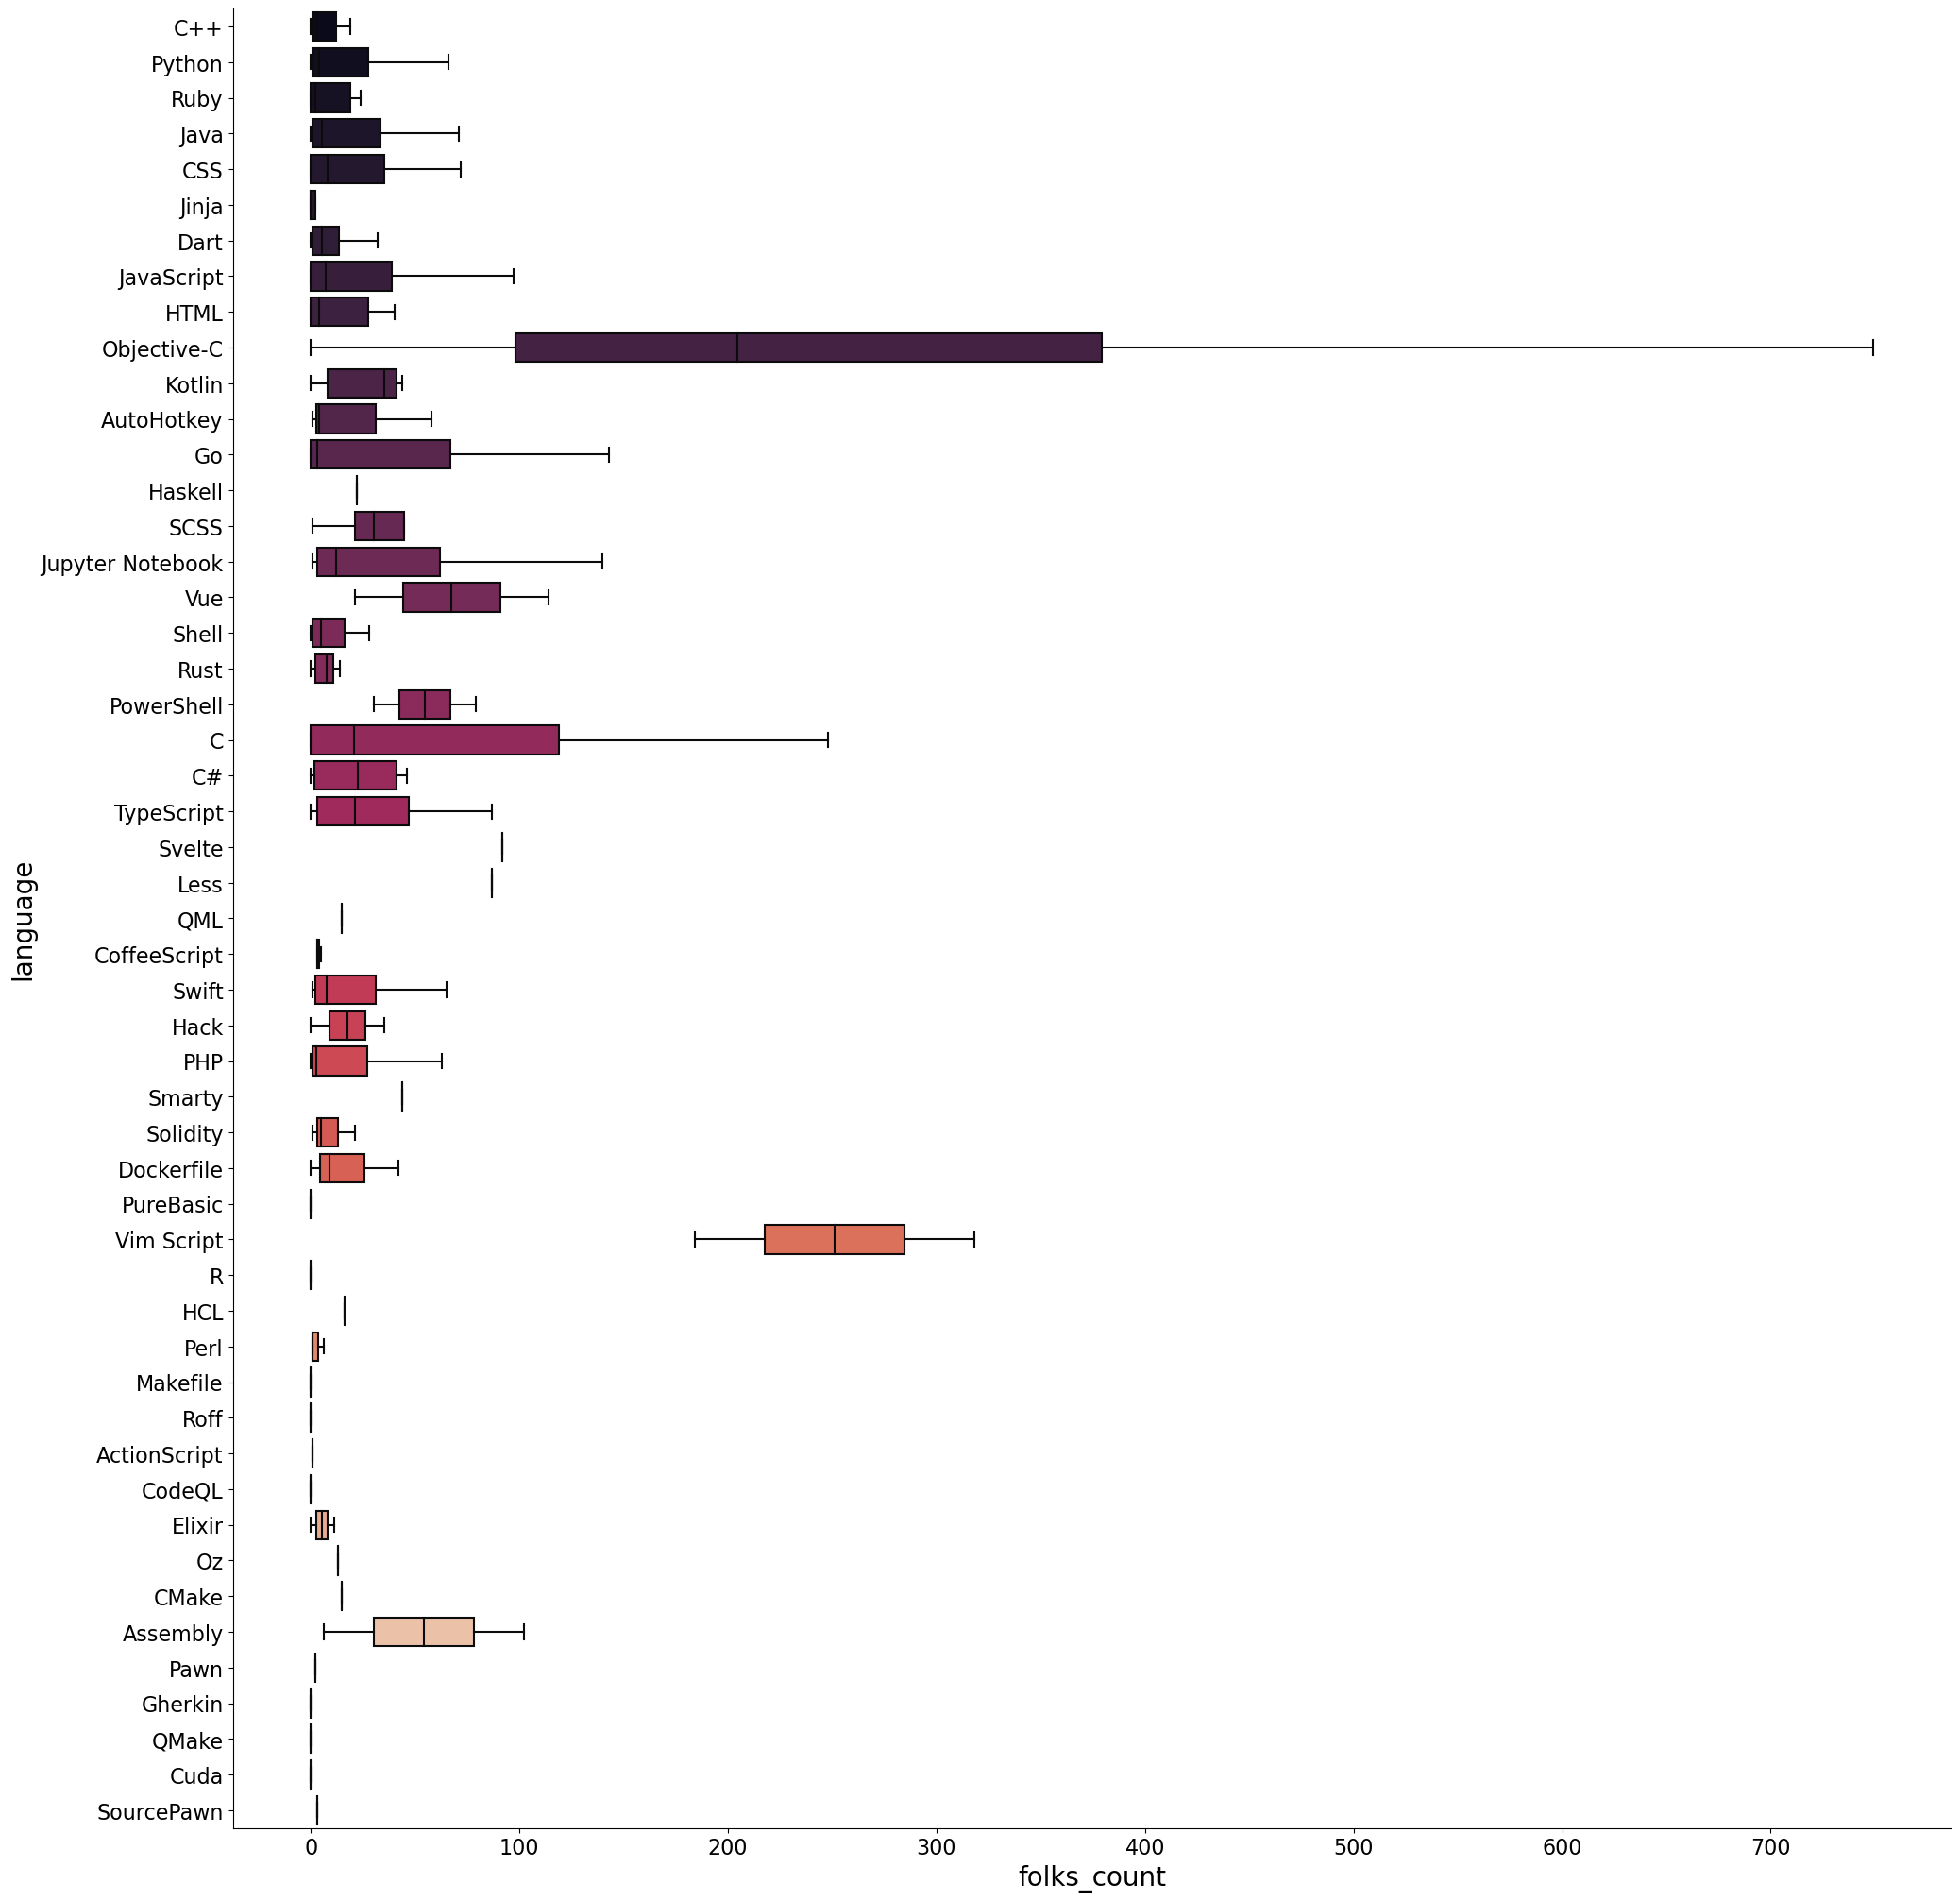

In [11]:
#forks_count箱型图
forks_count_box = sns.catplot(data=data, kind='box', y='language', x='forks_count', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('folks_count', fontsize=20)
plt.show()

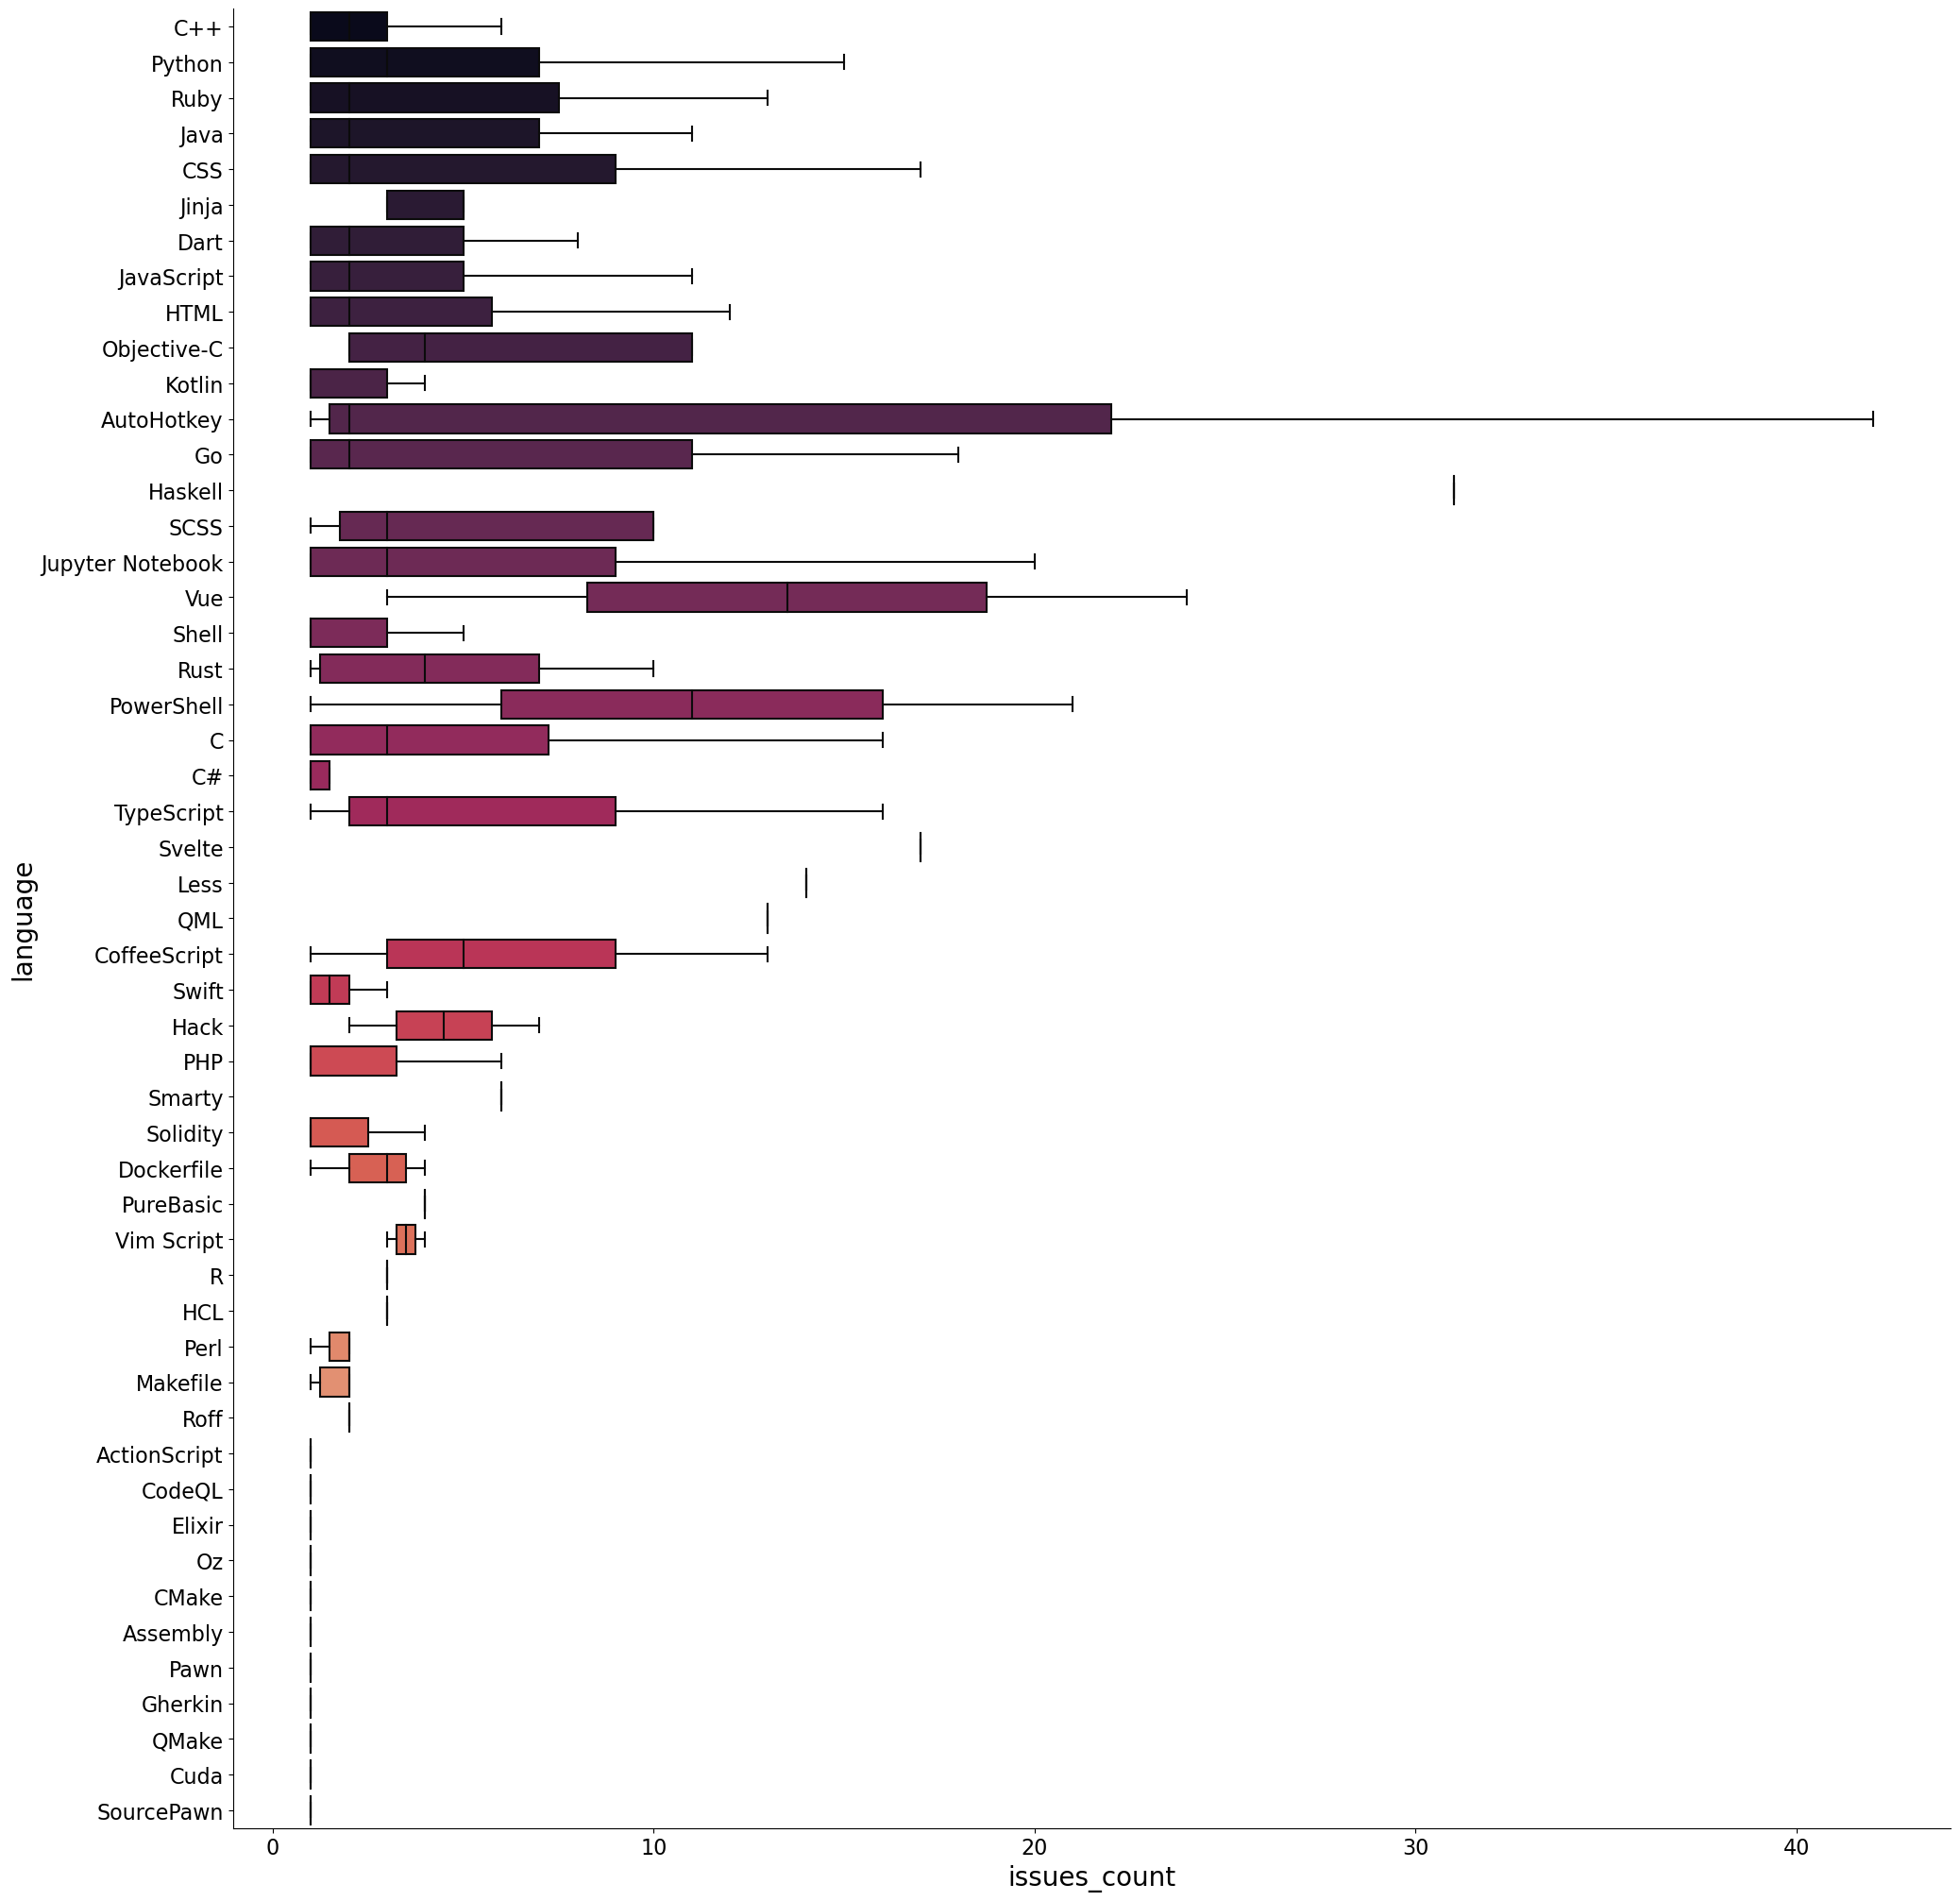

In [12]:
#issues_count箱型图
issues_count_box = sns.catplot(data=data, kind='box', y='language', x='issues_count', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('issues_count', fontsize=20)
plt.show()

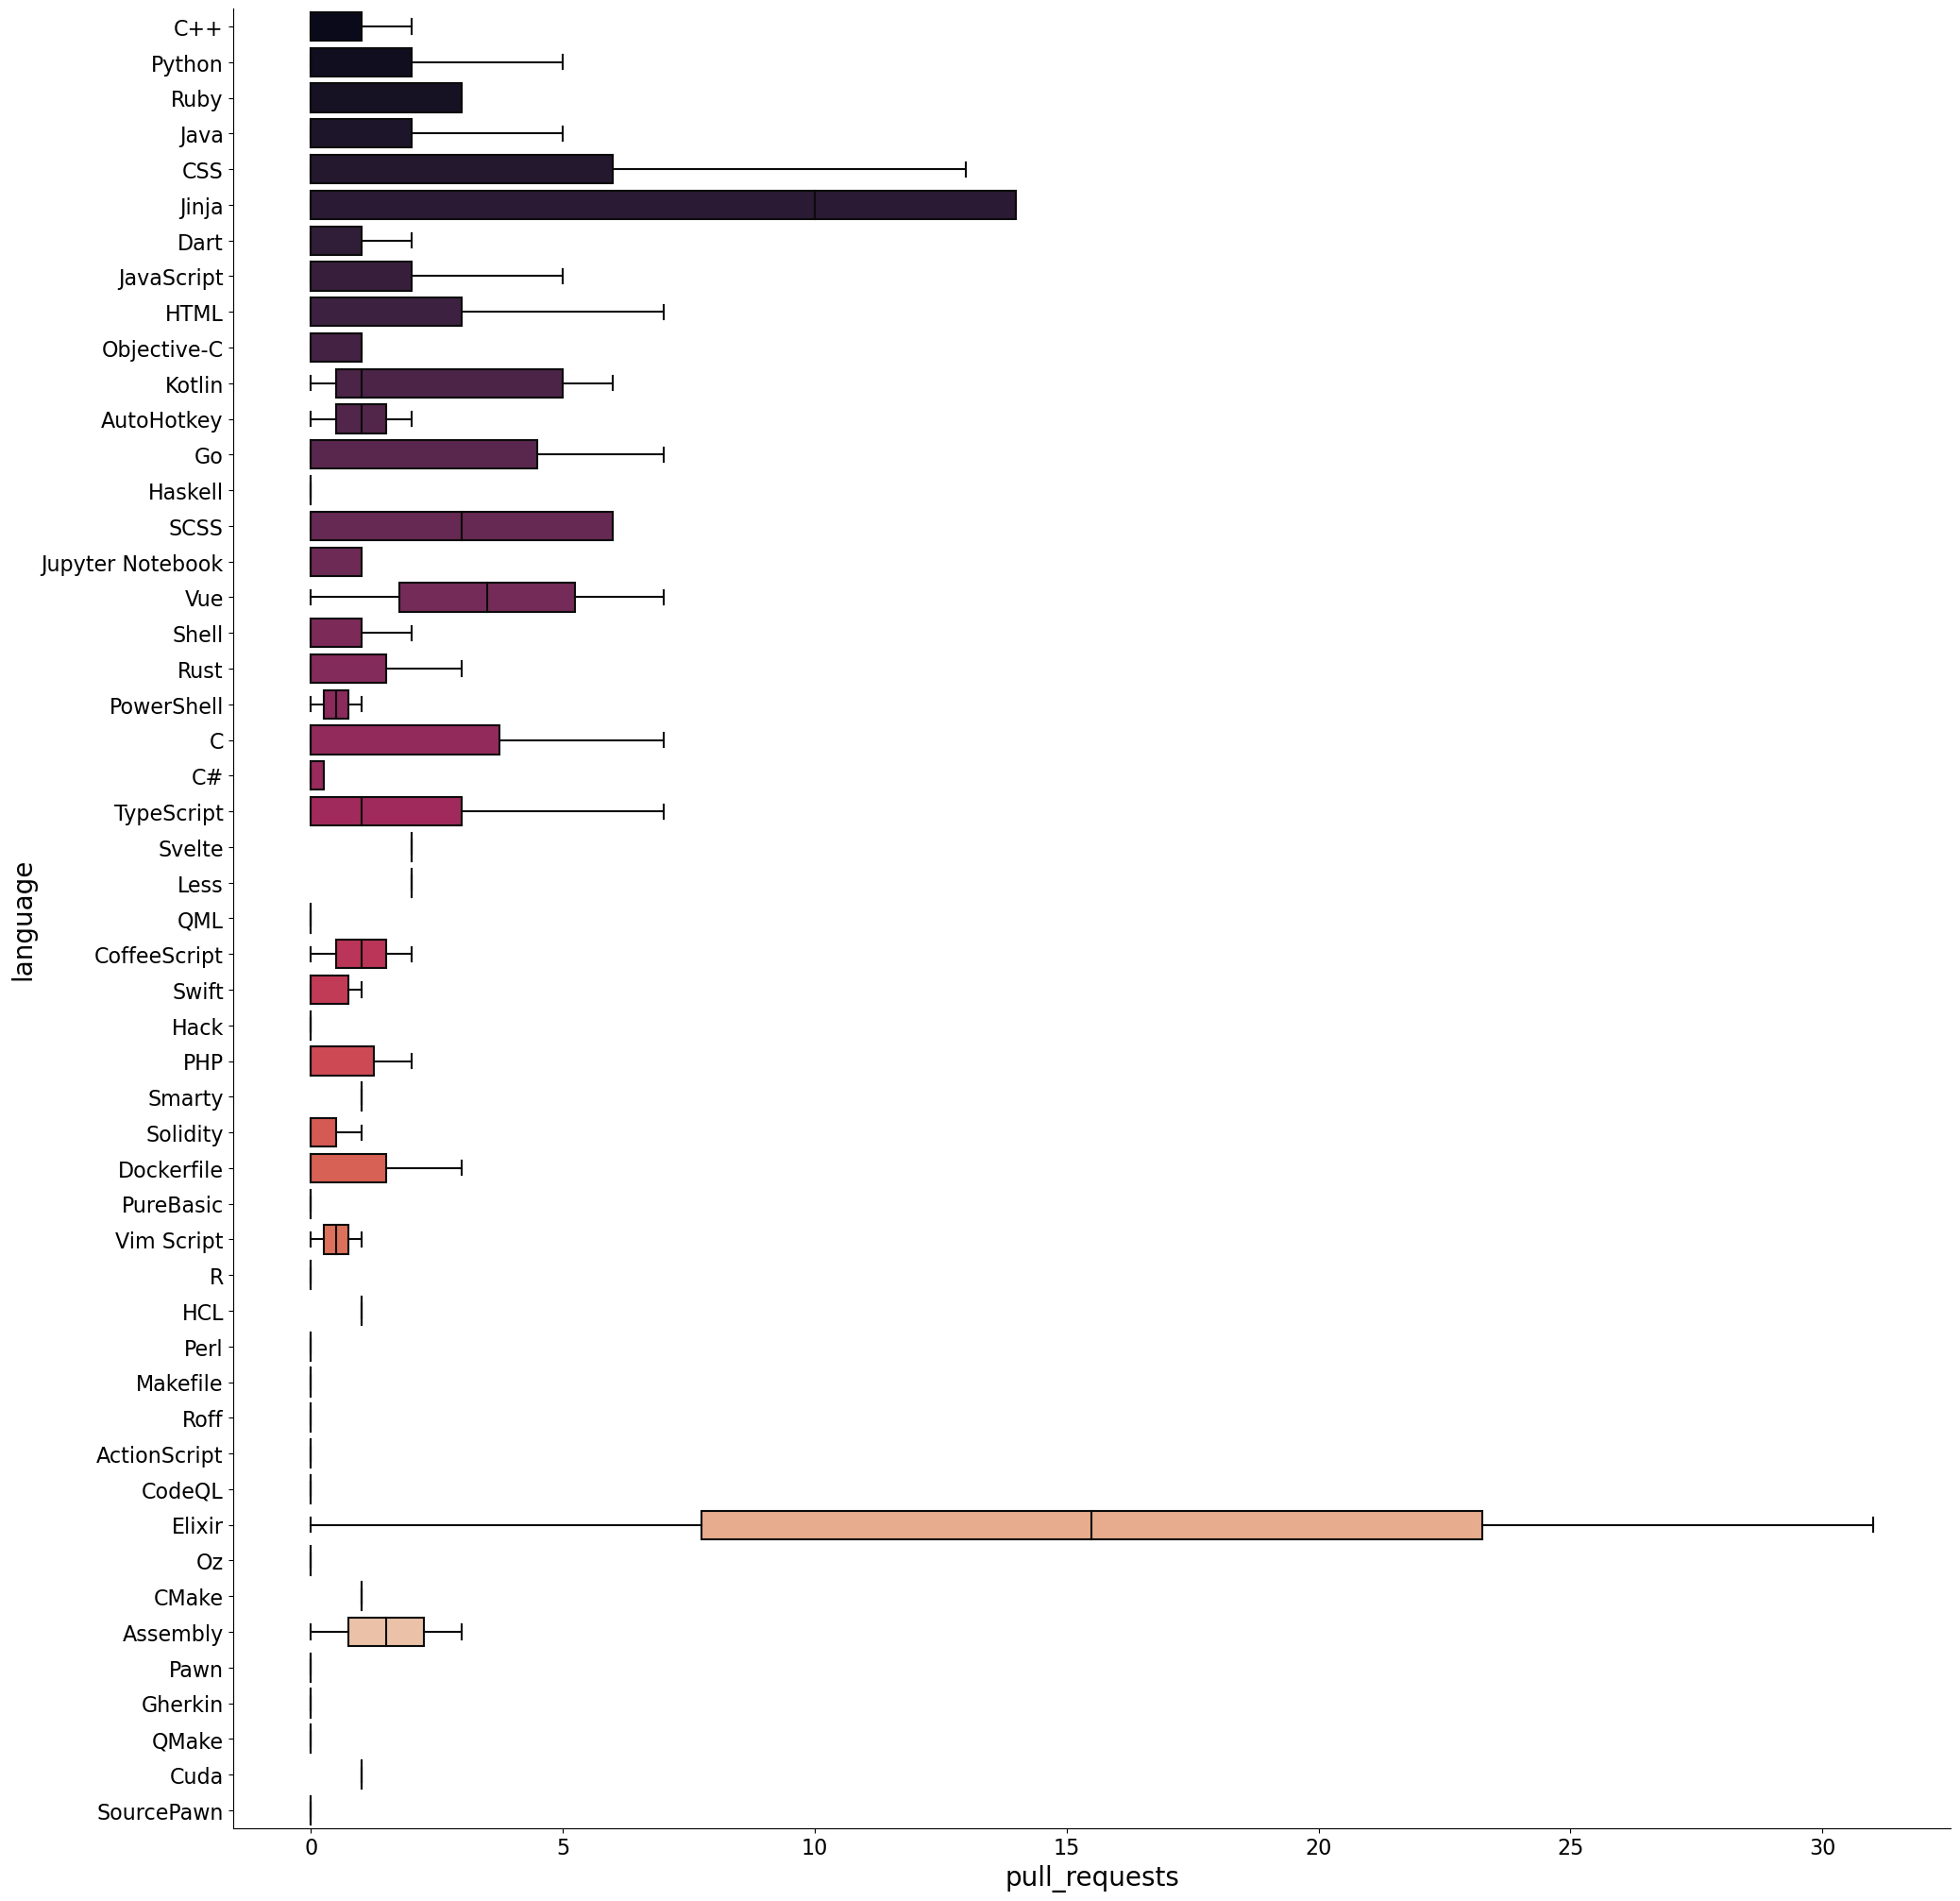

In [13]:
#pull_requests箱型图
pull_requests_box = sns.catplot(data=data, kind='box', y='language', x='pull_requests', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('pull_requests', fontsize=20)
plt.show()

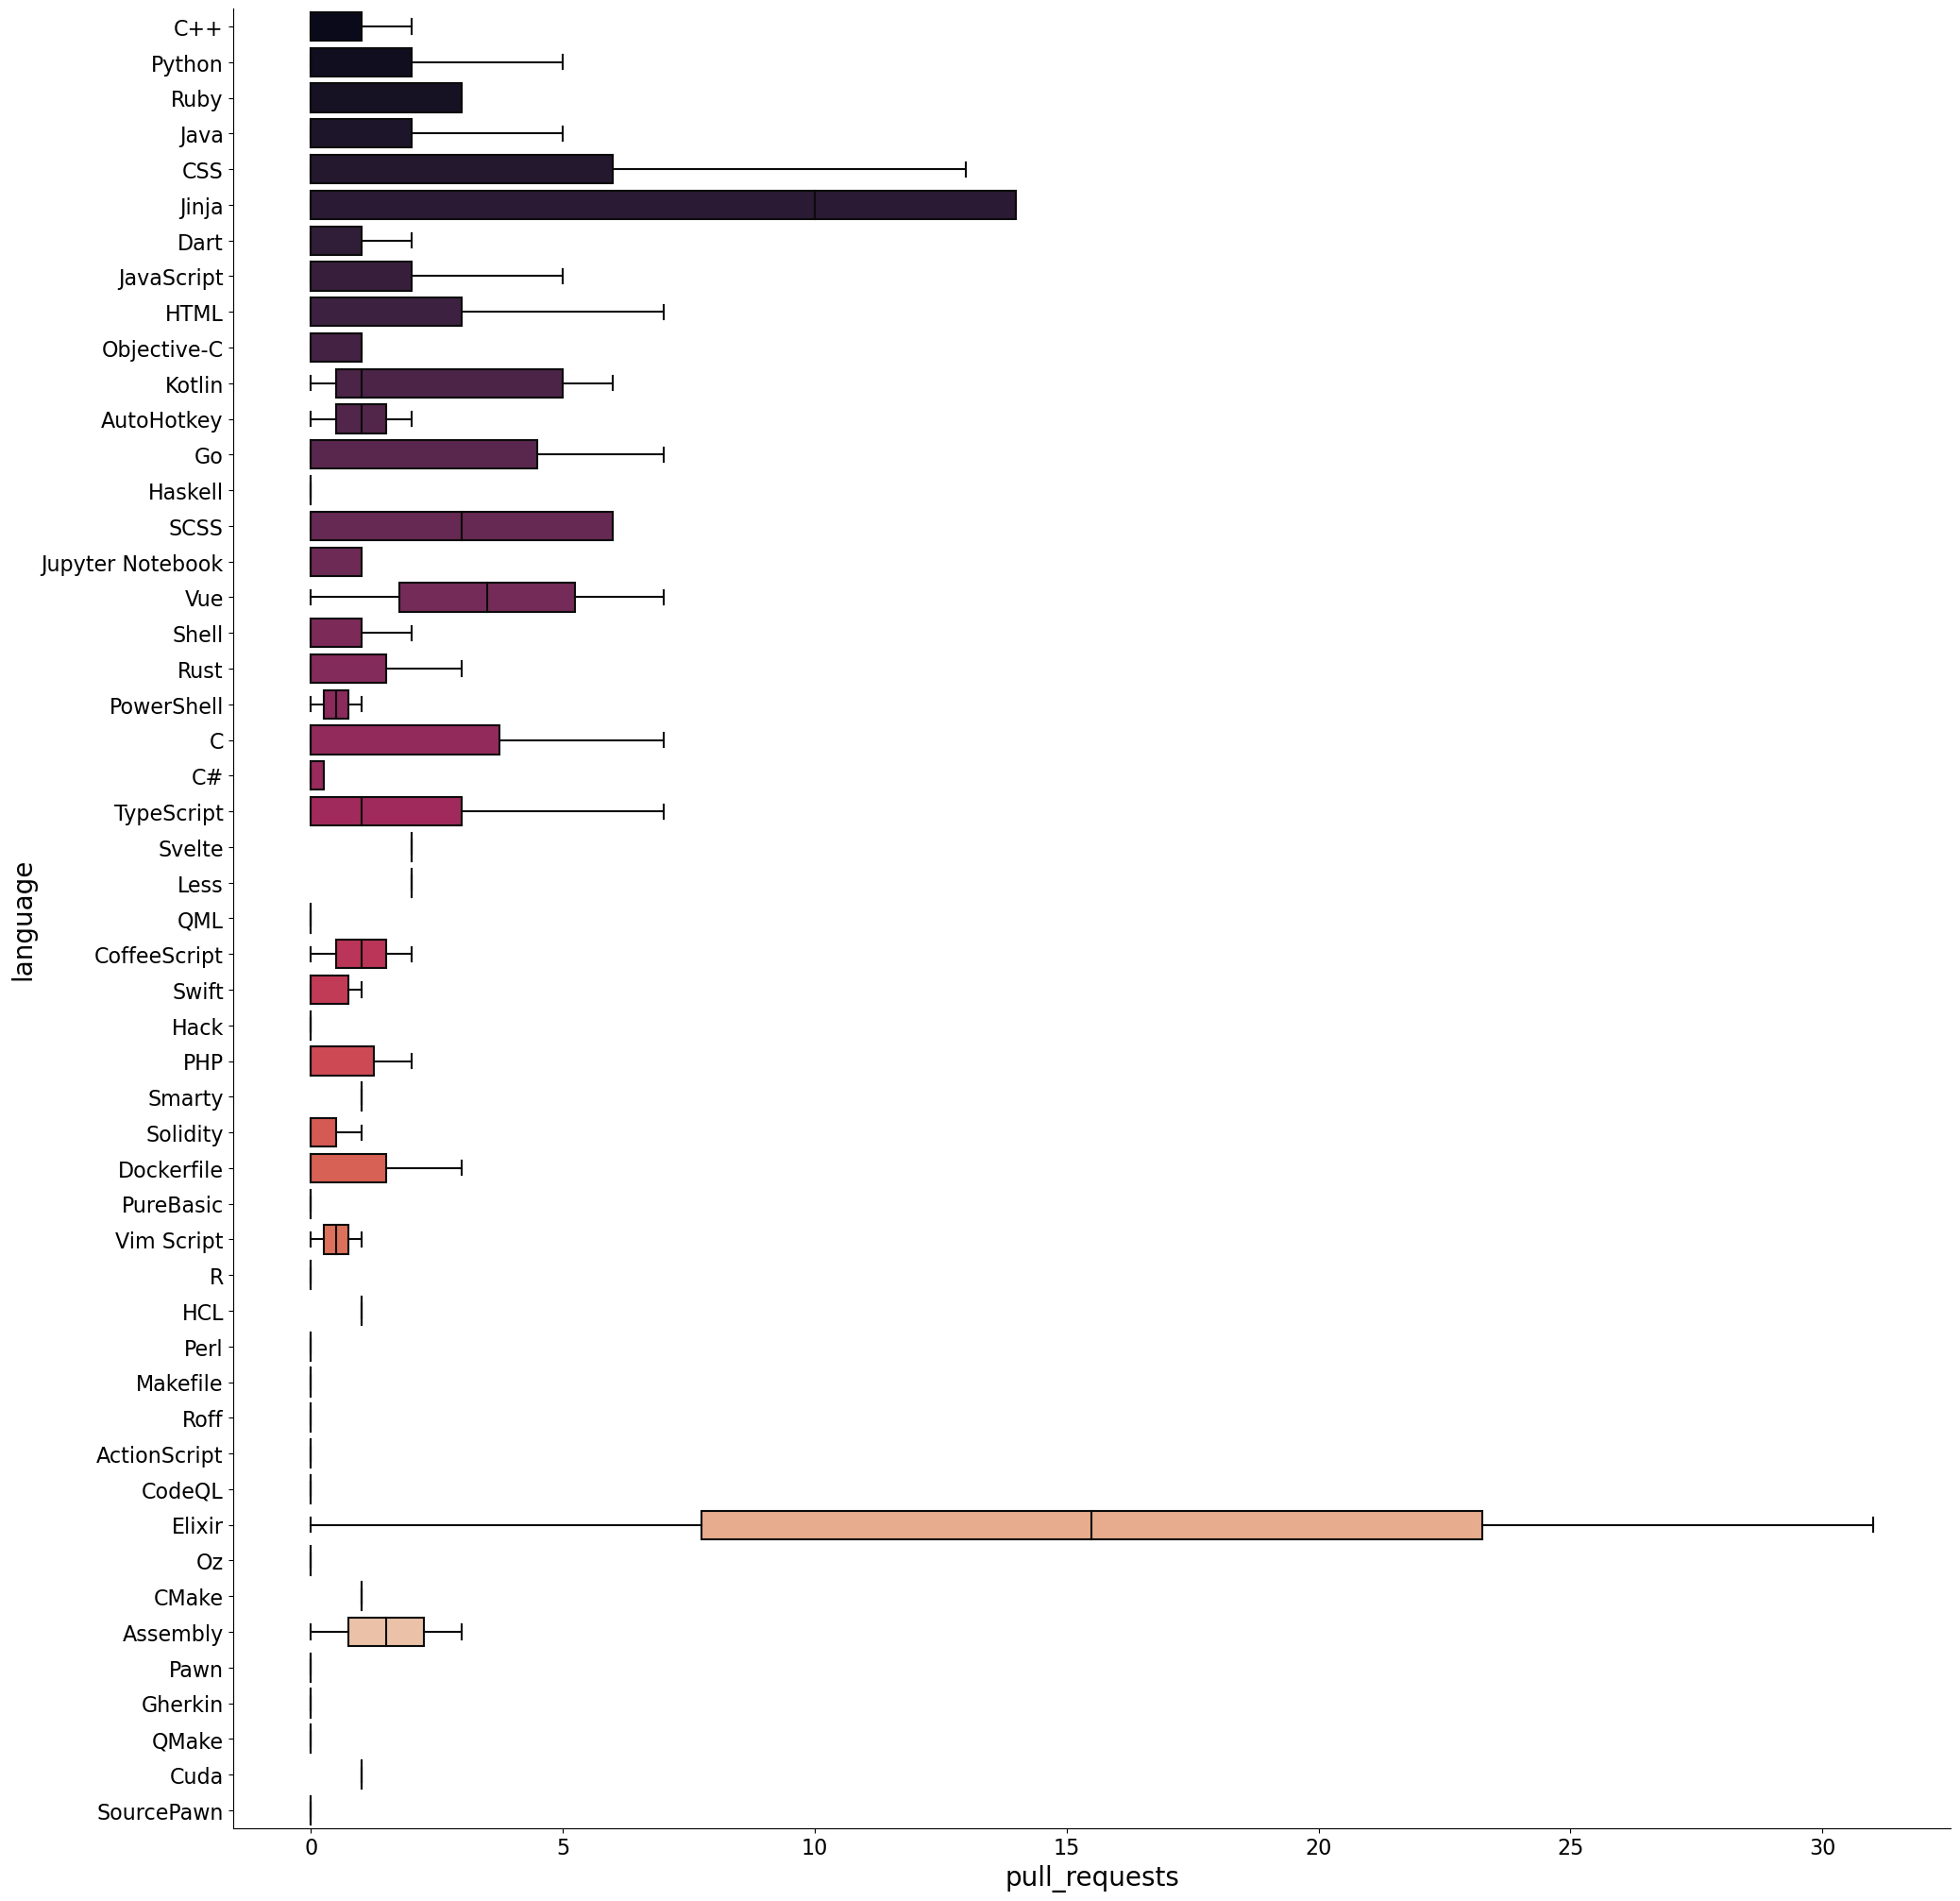

In [14]:
#pull_requests箱型图
pull_requests_box = sns.catplot(data=data, kind='box', y='language', x='pull_requests', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('pull_requests', fontsize=20)
plt.show()

C:\Users\周飞宇\AppData\Local\Temp\ipykernel_27540\2268699343.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  operation_counts = operation_counts.append(pd.DataFrame([['issues_count', c] for c in list(data['issues_count'])], columns=['operation', 'counts']), ignore_index=True)
C:\Users\周飞宇\AppData\Local\Temp\ipykernel_27540\2268699343.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  operation_counts = operation_counts.append(pd.DataFrame([['contributors', c] for c in list(data['contributors'])], columns=['operation', 'counts']), ignore_index=True)


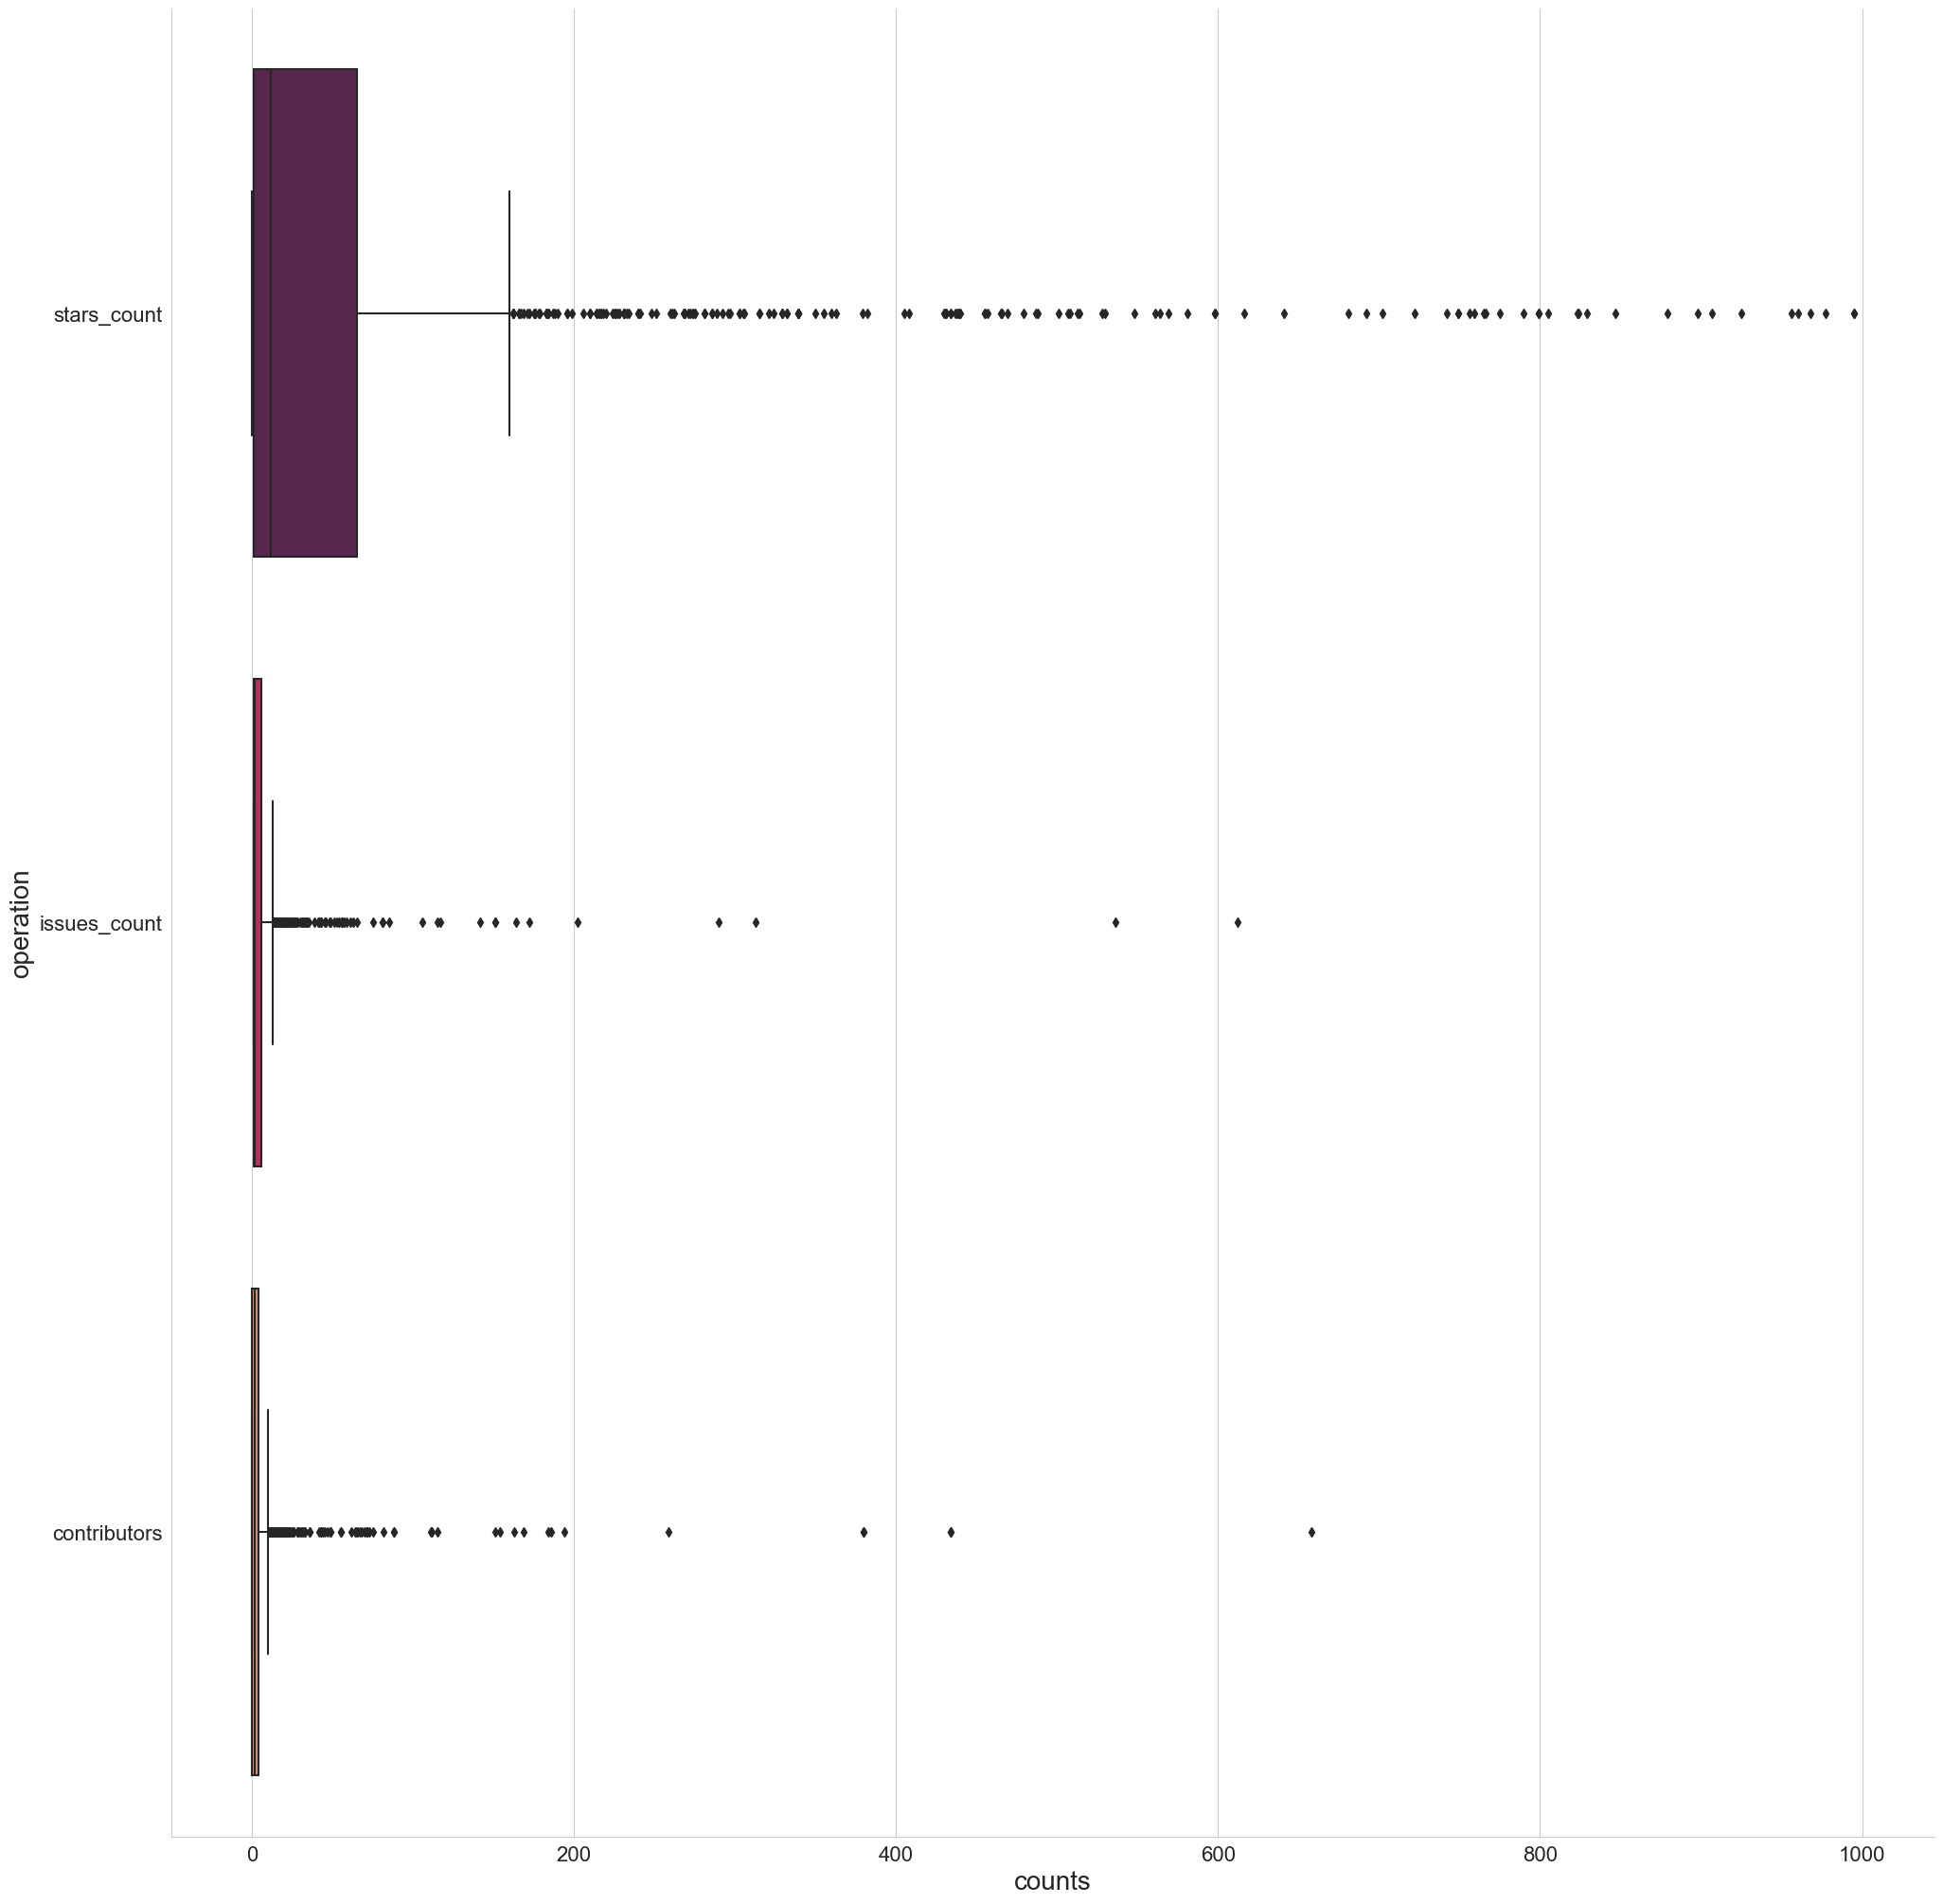

In [15]:
operation_counts = pd.DataFrame(list(data['stars_count']), columns=['counts'])
operation_counts = pd.DataFrame(operation_counts, columns=['operation', 'counts'])
operation_counts['operation'] = 'stars_count'
operation_counts = operation_counts.append(pd.DataFrame([['issues_count', c] for c in list(data['issues_count'])], columns=['operation', 'counts']), ignore_index=True)
operation_counts = operation_counts.append(pd.DataFrame([['contributors', c] for c in list(data['contributors'])], columns=['operation', 'counts']), ignore_index=True)
sns.set_style("whitegrid")
stars_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('operation', fontsize=20, )
plt.xlabel('counts', fontsize=20)
plt.show()

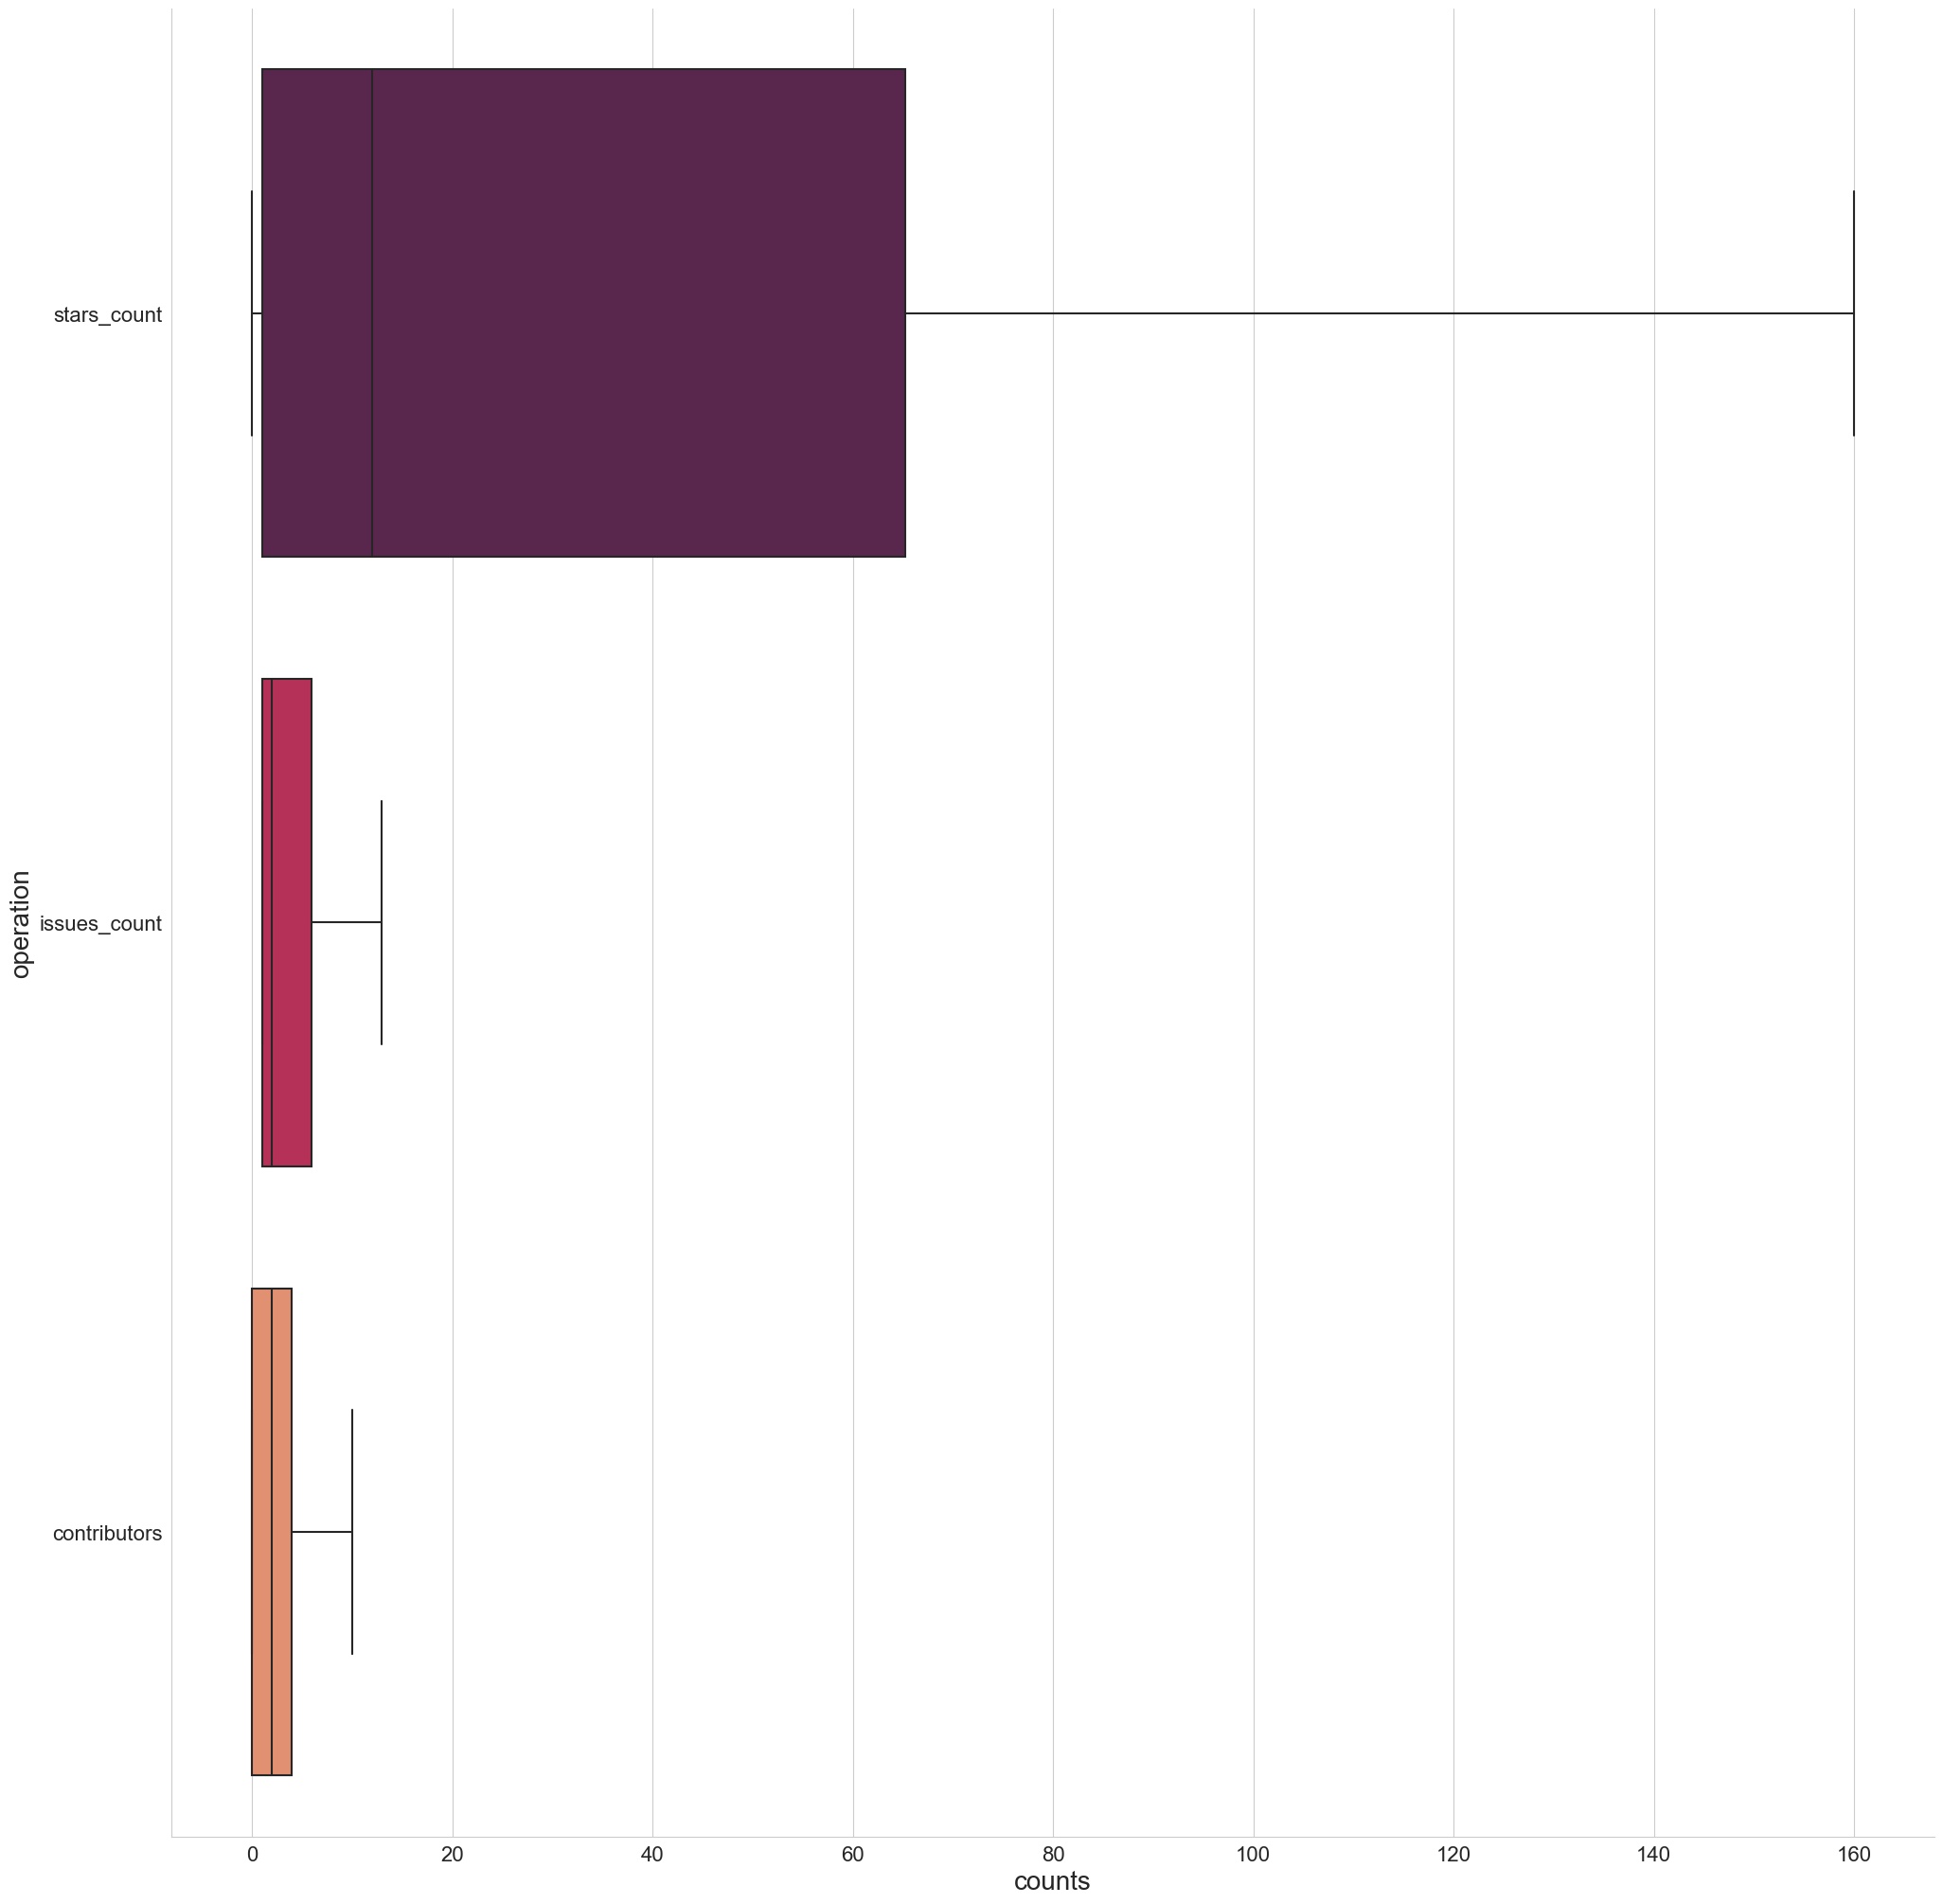

In [16]:
# No outliers
stars_count_box_no_outliers = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('operation', fontsize=20, )
plt.xlabel('counts', fontsize=20)
plt.show()

In [17]:
from numpy import nan as NA

In [18]:
data.isnull()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1047,False,False,False,False,False,False,False
1048,False,False,False,False,False,False,False
1049,False,False,False,False,False,False,False
1050,False,False,False,False,False,False,False


In [19]:
data_cleaned = data.dropna()
data_cleaned

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
5,shobhit97/open-gpstracker,0,0,172,0,3,Java
6,donnemartin/system-design-primer,0,0,164,164,115,Python
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


In [20]:
language_HF = language_counts.index[-1]
print('{} is the language with the highest frequency.'.format(language_HF))

JavaScript is the language with the highest frequency.


In [21]:
github_data_HF_replaced = data.replace(np.nan, language_HF)
github_data_HF_replaced

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,JavaScript
1,EddieHubCommunity/support,271,150,536,6,71,JavaScript
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


In [22]:
df_coded = pd.get_dummies(data, columns=['language'], dummy_na=True, drop_first=True)
df_coded.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language_Assembly,language_AutoHotkey,language_C,language_C#,...,language_Shell,language_Smarty,language_Solidity,language_SourcePawn,language_Svelte,language_Swift,language_TypeScript,language_Vim Script,language_Vue,language_nan
0,octocat/Hello-World,0,0,612,316,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,EddieHubCommunity/support,271,150,536,6,71,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,ethereum/aleth,0,0,313,27,154,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,localstack/localstack,0,0,290,30,434,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,education/classroom,0,589,202,22,67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\周飞宇\AppData\Local\Temp\ipykernel_27540\1817867977.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_coded.corr(method='spearman'), cmap='YlGnBu', annot=True)


Text(0.5, 1.0, 'Correlation Analysis')

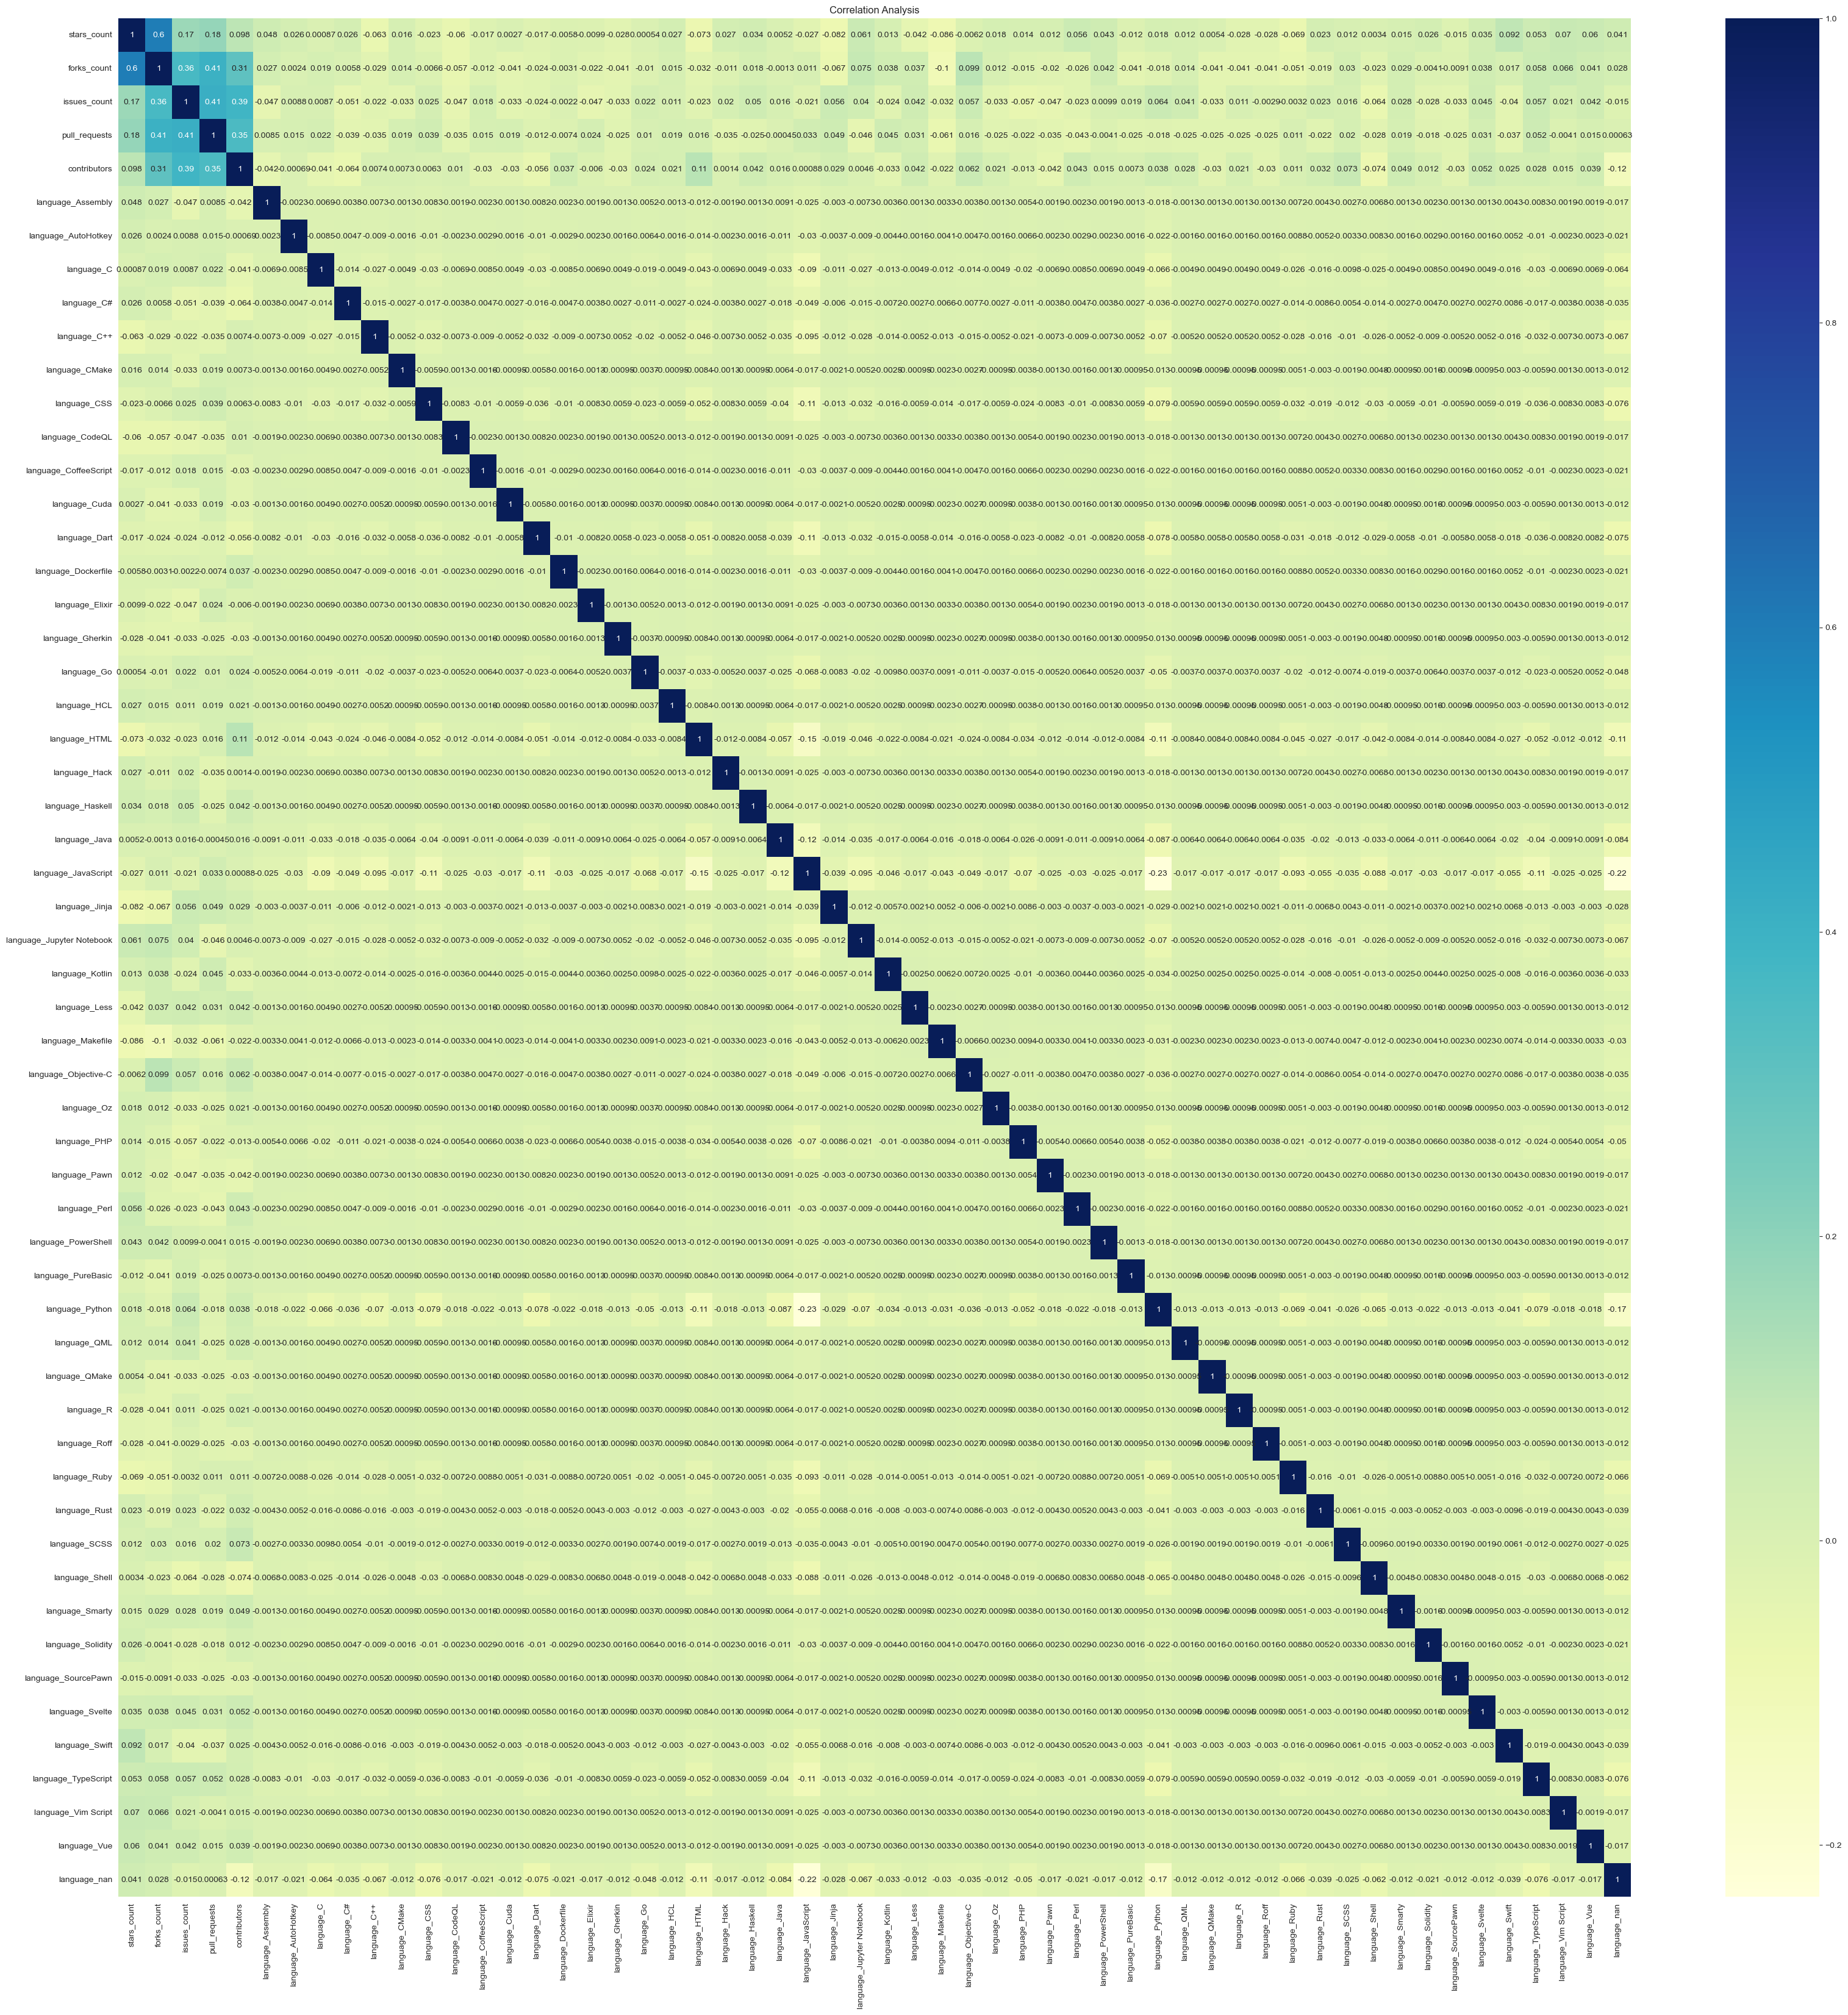

In [23]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_coded.corr(method='spearman'), cmap='YlGnBu', annot=True)
plt.title('Correlation Analysis')

In [24]:
github_data_attr_corr = data

In [25]:
df1 = github_data_attr_corr.groupby('language').agg(avg=('stars_count', 'mean'))
df1

,avg
language,
ActionScript,3.000000
Assembly,426.000000
AutoHotkey,118.333333
C,153.076923
C#,43.250000
C++,39.172414
CMake,30.000000
CSS,49.675676
CodeQL,0.000000


In [26]:
for i in range(len(github_data_attr_corr)):
    if github_data_attr_corr['language'].iloc[i] is NA:
        rate = github_data_attr_corr['stars_count'].iloc[i]
        dist = []
        for j in range(len(df1)):
            dist.append(abs(df1.iloc[j]['avg']-rate))
        idx = dist.index(min(dist))
        github_data_attr_corr['language'].iloc[i] = df1.index[idx]
github_data_attr_corr['language'].value_counts()

C:\Users\周飞宇\AppData\Local\Temp\ipykernel_27540\470285478.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  github_data_attr_corr['language'].iloc[i] = df1.index[idx]


JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
Dart                 38
TypeScript           38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
PHP                  17
Go                   17
Perl                 14
ActionScript         12
Swift                10
Rust                 10
C#                   10
Kotlin               10
Vim Script            9
CoffeeScript          9
Pawn                  8
Objective-C           8
Cuda                  7
Gherkin               7
SCSS                  7
Makefile              6
SourcePawn            6
AutoHotkey            5
QMake                 5
Jinja                 5
Assembly              4
PureBasic             4
Hack                  4
QML                   3
CMake                 3
Dockerfile            3
HCL                   3
Solidity              3
Elixir          

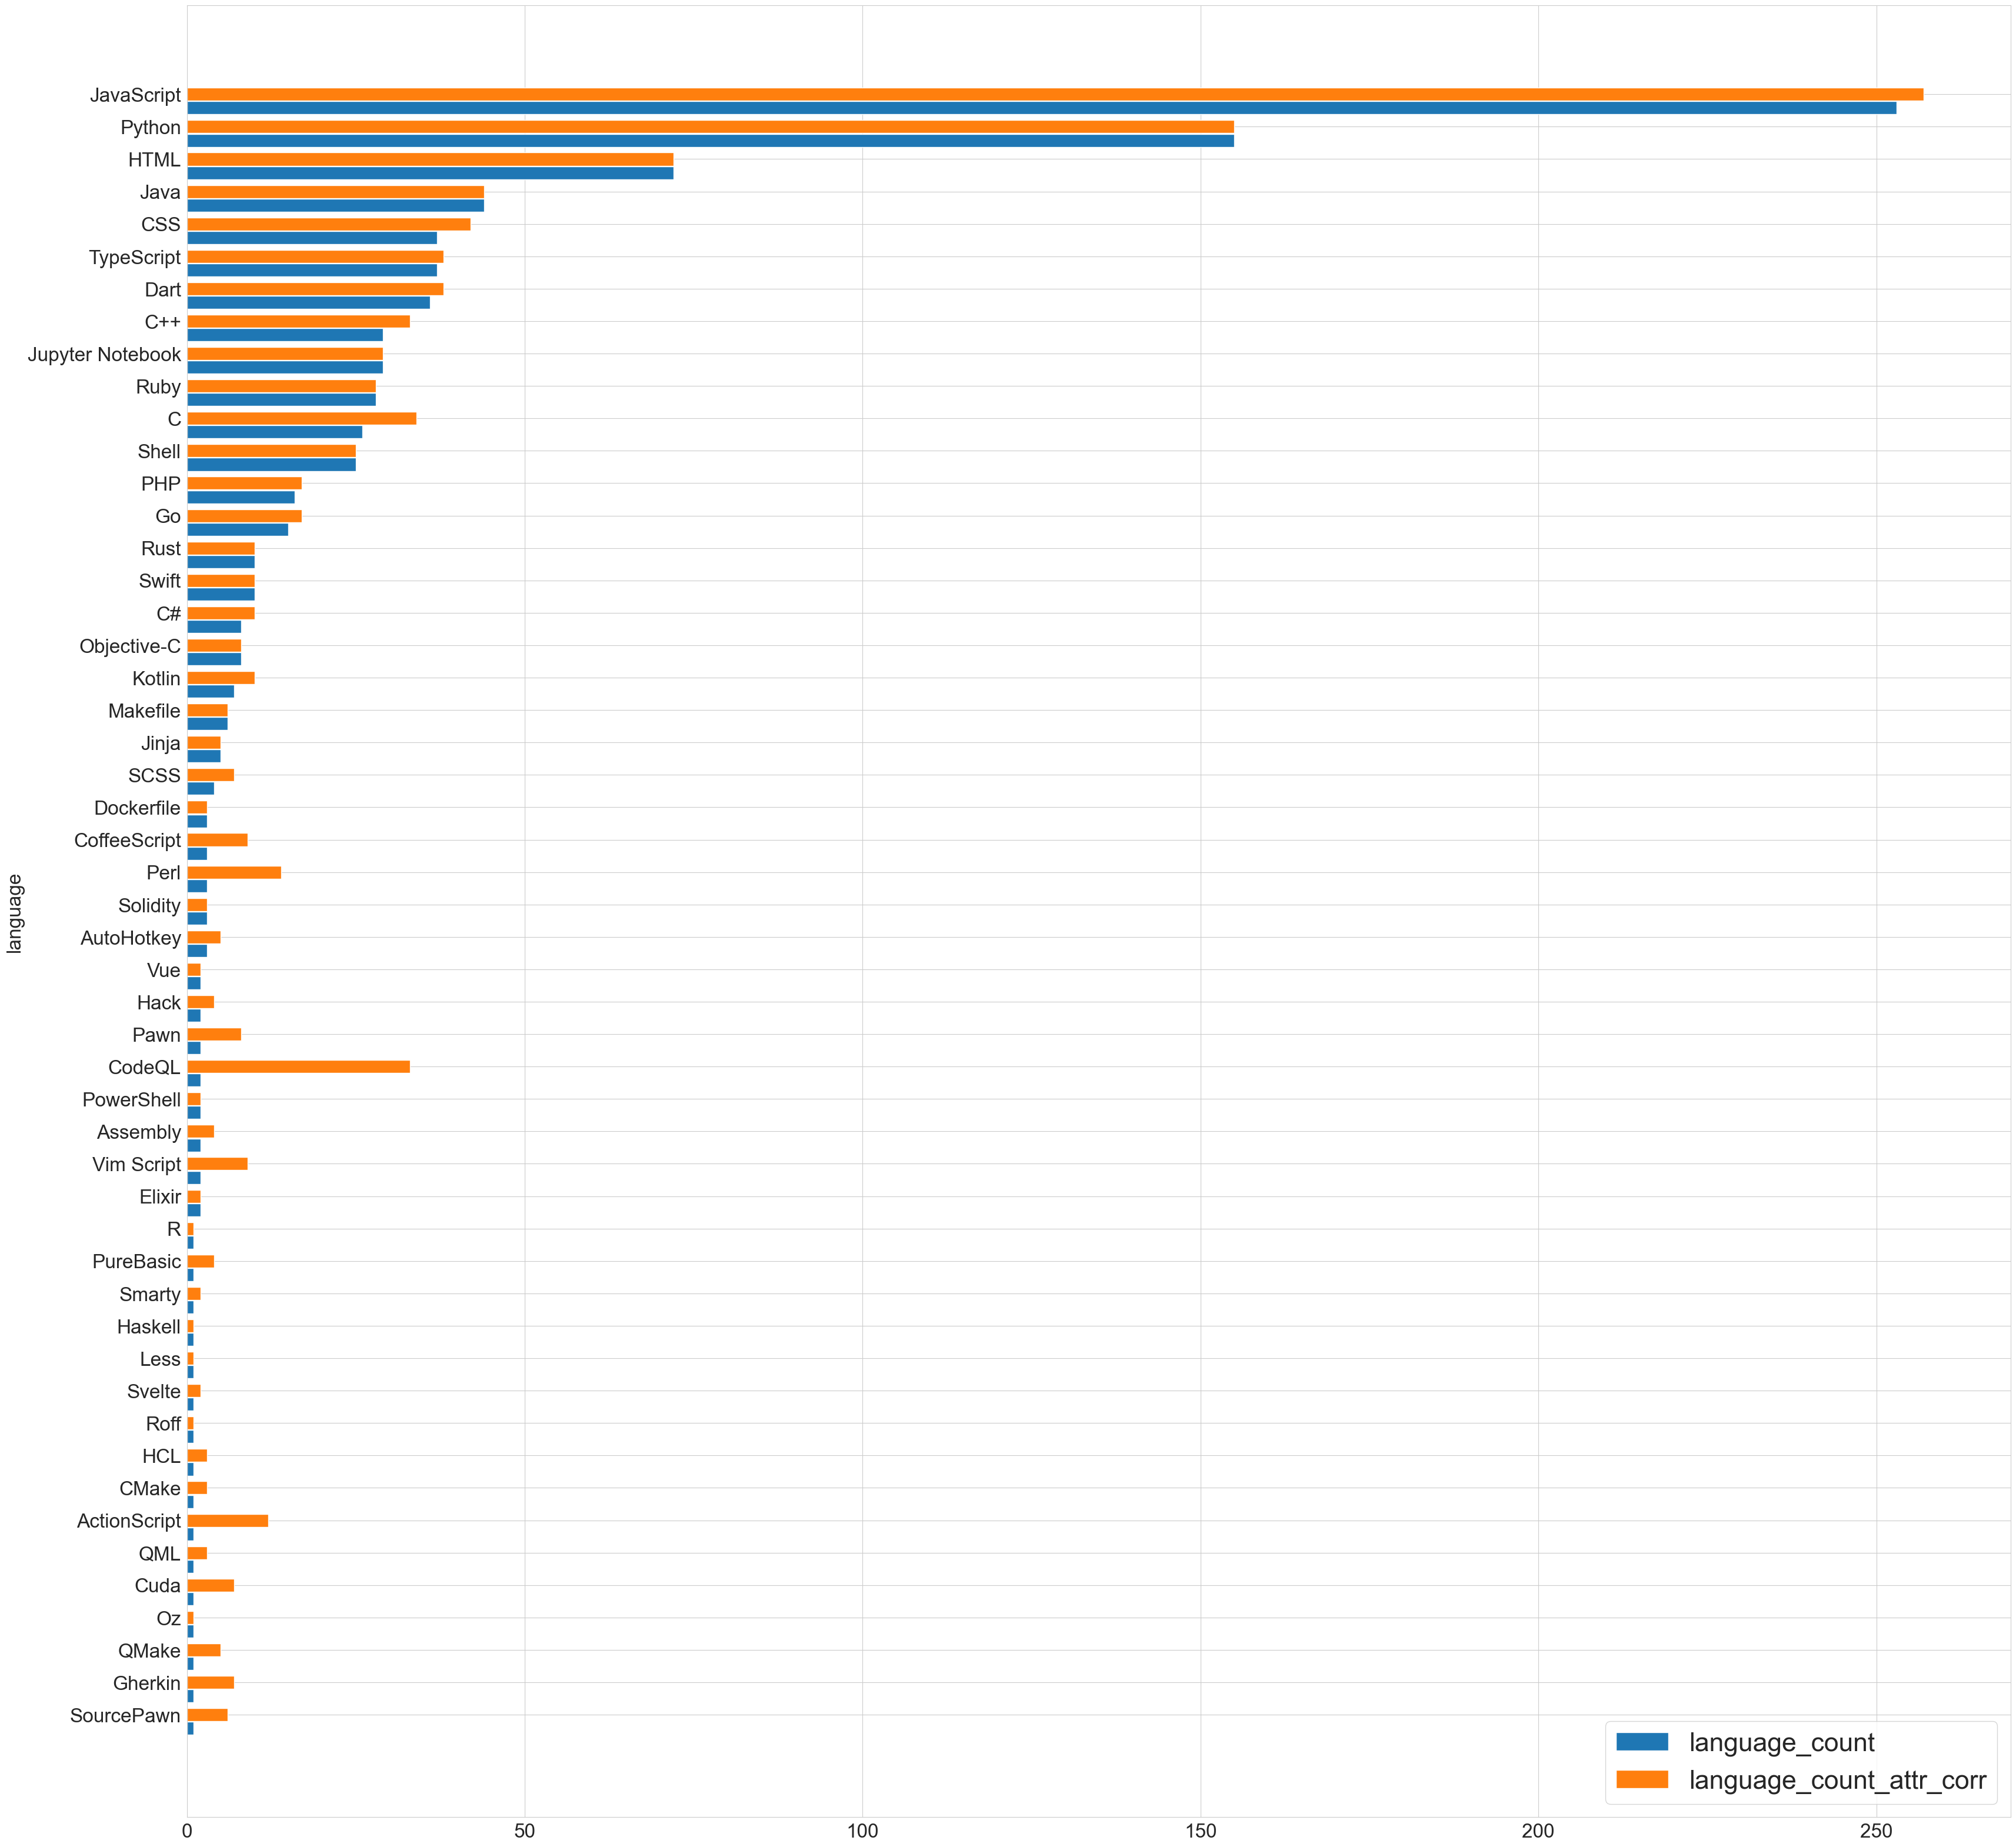

In [27]:
language_count_attr_corr = language_counts
language_count_attr_corr['language_count_attr_corr'] = [0] * len(language_counts)

for level in list(language_counts.index):
    if level in list(github_data_attr_corr['language'].value_counts().index):
        language_count_attr_corr.loc[[level], ['language_count_attr_corr']] = github_data_attr_corr['language'].value_counts().loc[[level]].values[0]
        
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(language_count_attr_corr))), tick_label=language_count_attr_corr.index, width=language_count_attr_corr['language_count'], label='language_count', height=0.4)
plt.barh([d+0.42 for d in list(range(len(language_count_attr_corr)))], tick_label=language_count_attr_corr.index, width=language_count_attr_corr['language_count_attr_corr'], label='language_count_attr_corr', height=0.4)
plt.ylabel('language', fontsize=24)
plt.xlabel('', fontsize=24)
# plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

In [28]:
github_data_sample_corr = data

In [29]:
def regularit(df):
    new_df = pd.DataFrame(index=df.index)
    columns = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        new_df[c] = ((d - MIN) / (d - MAX))
    return new_df

In [30]:
normal_github_data = regularit(github_data_sample_corr)
normal_github_data

,stars_count,forks_count,issues_count,pull_requests,contributors
0,-0.000000,-0.000000,inf,-1.258964,-0.003049
1,-0.374309,-0.182260,-7.039474,-0.010695,-0.120954
2,-0.000000,-0.000000,-1.043478,-0.050000,-0.305556
3,-0.000000,-0.000000,-0.897516,-0.055866,-1.937500
4,-0.000000,-1.533854,-0.490244,-0.040367,-0.113367
...,...,...,...,...,...
1047,-0.002014,-0.001029,-0.000000,-0.000000,-0.000000
1048,-0.000000,-0.000000,-0.000000,-0.000000,-0.012308
1049,-0.000000,-0.005165,-0.000000,-0.001767,-0.010753
1050,-0.011179,-0.005165,-0.000000,-0.000000,-0.000000


In [31]:
normal_language = pd.concat([normal_github_data, github_data_sample_corr['language']], axis=1)
normal_language

,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,-0.000000,-0.000000,inf,-1.258964,-0.003049,CodeQL
1,-0.374309,-0.182260,-7.039474,-0.010695,-0.120954,Perl
2,-0.000000,-0.000000,-1.043478,-0.050000,-0.305556,C++
3,-0.000000,-0.000000,-0.897516,-0.055866,-1.937500,Python
4,-0.000000,-1.533854,-0.490244,-0.040367,-0.113367,Ruby
...,...,...,...,...,...,...
1047,-0.002014,-0.001029,-0.000000,-0.000000,-0.000000,Dart
1048,-0.000000,-0.000000,-0.000000,-0.000000,-0.012308,HTML
1049,-0.000000,-0.005165,-0.000000,-0.001767,-0.010753,Python
1050,-0.011179,-0.005165,-0.000000,-0.000000,-0.000000,JavaScript


In [32]:
infos = []
for i in range(len(normal_language)):
    info = []
    star = normal_language['stars_count'].iloc[i]
    fork = normal_language['forks_count'].iloc[i]
    issue = normal_language['issues_count'].iloc[i]
    pull = normal_language['pull_requests'].iloc[i]
    contributor = normal_language['contributors'].iloc[i]
    info.append(star)
    info.append(fork)
    info.append(issue)
    info.append(pull)
    info.append(contributor)
    infos.append(info)

In [33]:
for i in range(len(normal_language)):
    if normal_language['language'].iloc[i] is NA:
        dists = []
        for j in len(rates):
            dist = np.sqrt(np.sum(np.square(infos[i] - infos[j])))
            dists.append(dist)
        idx = dists.index(min(dists))
        github_data_sample_corr['language'].iloc[i] = github_data_sample_corr['language'].iloc[idx]
github_data_sample_corr['language'].value_counts()

JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
Dart                 38
TypeScript           38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
PHP                  17
Go                   17
Perl                 14
ActionScript         12
Swift                10
Rust                 10
C#                   10
Kotlin               10
Vim Script            9
CoffeeScript          9
Pawn                  8
Objective-C           8
Cuda                  7
Gherkin               7
SCSS                  7
Makefile              6
SourcePawn            6
AutoHotkey            5
QMake                 5
Jinja                 5
Assembly              4
PureBasic             4
Hack                  4
QML                   3
CMake                 3
Dockerfile            3
HCL                   3
Solidity              3
Elixir          

# movie dataset

In [34]:
filename = './datasets/Movies Dataset/movies_dataset.csv'
data = pd.read_csv(filename)
data.head()

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman


In [35]:
data.columns

Index(['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads',
       'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

In [36]:
data=data.drop(columns='Unnamed: 0')

In [37]:
for col in 'downloads', 'views':
    data[col] = data[col].str.replace(',','')
    data[col] = data[col].astype('float')

data['id'] = data['id'].astype('str')

In [38]:
data['id'].value_counts()

372090    402
371744    402
371877    402
372092    202
371991    202
         ... 
303381      1
303380      1
303379      1
303377      1
30459       1
Name: id, Length: 17086, dtype: int64

In [39]:
data['appropriate_for'].value_counts()

R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64

In [40]:
data['language'].value_counts()

English                                 12657
Hindi                                    2558
English,Spanish                           391
Punjabi                                   310
English,Hindi                             304
                                        ...  
English,Korean,Spanish                      1
Norwegian,Swedish                           1
Spanish,Chinese,English,Maori,French        1
Urdu,Punjabi,English                        1
Spanish,German,English                      1
Name: language, Length: 1168, dtype: int64

In [41]:
data['industry'].value_counts()

Hollywood / English    14649
Bollywood / Indian      2645
Tollywood               1172
Anime / Kids            1049
Wrestling                433
Punjabi                  332
Stage shows              129
Pakistani                 92
Dub / Dual Audio          45
3D Movies                  1
Name: industry, dtype: int64

In [42]:
data['posted_date'].value_counts()

13 Feb, 2023    812
20 Feb, 2023    607
15 Feb, 2023    607
10 Feb, 2023    485
16 Feb, 2023    406
               ... 
12 Sep, 2009      1
08 Sep, 2009      1
01 Sep, 2009      1
18 Aug, 2009      1
30 Nov, 2011      1
Name: posted_date, Length: 4123, dtype: int64

In [43]:
data['release_date'].value_counts()

Jan 01 1970    962
Feb 03 2023    616
Feb 17 2023    607
Feb 10 2023    410
Feb 11 2023    402
              ... 
Sep 05 2003      1
Dec 29 2022      1
Aug 24 2013      1
Jan 12 2014      1
Mar 28 1958      1
Name: release_date, Length: 4886, dtype: int64

In [44]:
data['run_time'].value_counts()

93          652
88          622
101         568
139         454
95          454
           ... 
74 min        1
288           1
220           1
49min         1
3h 13min      1
Name: run_time, Length: 415, dtype: int64

In [45]:
data['director'].value_counts()

Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawan, Shivani Thakur      1
Suman Mukhopadhyay                              1
Shea Sizemore                                   1
Name: director, Length: 9672, dtype: int64

In [46]:
data['writer'].value_counts()

Nicholas Schutt                           403
Venky Atluri                              402
Haley Harris                              402
John Swab                                 205
Elegance Bratton                          202
                                         ... 
Barbara Samuels, Joseph Boyden              1
Maria Allred                                1
Pia Mechler                                 1
Paul Flannery, David Ryan Keith             1
Khwaja Ahmad Abbas, Khwaja Ahmad Abbas      1
Name: writer, Length: 13603, dtype: int64

In [47]:
numeric_data = pd.DataFrame(data, columns=['views', 'downloads', 'IMDb-rating'])
numeric_data.head()

,views,downloads,IMDb-rating
0,2794.0,304.0,4.8
1,1002.0,73.0,6.4
2,14419.0,1427.0,5.2
3,4878.0,1549.0,8.1
4,2438.0,657.0,4.6


In [48]:
numeric_data.describe().loc[['max', '75%', '50%', '25%', 'min']]

,views,downloads,IMDb-rating
max,1638533.0,391272.0,9.9
75%,36571.0,10070.0,6.6
50%,15222.0,2716.0,5.7
25%,7571.5,855.5,4.8
min,667.0,0.0,1.1


In [49]:
NaN_counts = data.isna().sum()
NaN_counts = pd.DataFrame(NaN_counts, columns=['NaN_counts']).T
NaN_counts

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
NaN_counts,841,9476,1938,1,0,1,542,1,1,1768,1701,1,1,2192


In [50]:
#缺失值处理
data_cleaned = data.dropna()
data_cleaned

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
7,6.5,R,Benjamin Caron,1781.0,371751,Hollywood / English,English,"13 Feb, 2023",Feb 17 2023,116,"Motivations are suspect, and expectations are ...",Sharper,18225.0,"Brian Gatewood, Alessandro Tanaka"
8,6.9,PG-13,Ravi Kapoor,458.0,372042,Hollywood / English,English,"18 Feb, 2023",Dec 02 2022,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,6912.0,Ravi Kapoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20522,7.1,Not Rated,Biren Nag,1932.0,23825,Bollywood / Indian,Hindi,"01 Jan, 1970",May 11 1962,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,6076.0,"Dhruva Chatterjee, Dev Kishan"
20525,7.0,G,Guy Hamilton,2544.0,25548,Hollywood / English,"English,German,Polish,French","01 Jan, 1970",Sep 17 1969,132,Historical reenactment of the air war in the e...,Battle of Britain,9319.0,"James Kennaway, Wilfred Greatorex, Derek Dempster"
20533,5.6,R,Barbara Topsøe-Rothenborg,12284.0,1173,Hollywood / English,"Spanish,German,English","26 May, 2016",Jan 01 1970,90,"LOVE AT FIRST HICCUP is a charming, innocent, ...",Love at First Hiccup,36022.0,"Barbara Topsøe-Rothenborg, Søren Frellesen, De..."
20537,7.1,Not Rated,Biren Nag,1932.0,23825,Bollywood / Indian,Hindi,"01 Jan, 1970",May 11 1962,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,6077.0,"Dhruva Chatterjee, Dev Kishan"


In [51]:
import copy
HF = {}
mov_data_HF_replaced = copy.deepcopy(data)
for col in mov_data_HF_replaced:
    HF[col] = mov_data_HF_replaced[col].value_counts().index[0]
HF['language'] = 'English'

HF

{'IMDb-rating': 6.6,
 'appropriate_for': 'R',
 'director': 'Venky Atluri',
 'downloads': 75.0,
 'id': '372090',
 'industry': 'Hollywood / English',
 'language': 'English',
 'posted_date': '13 Feb, 2023',
 'release_date': 'Jan 01 1970',
 'run_time': '93',
 'storyline': 'The life of a young man and his struggles against the privatization of education.',
 'title': 'The Girl Who Escaped: The Kara Robinson Story',
 'views': 6259.0,
 'writer': 'Nicholas Schutt'}

In [52]:
for col in mov_data_HF_replaced:
    mov_data_HF_replaced[col] = mov_data_HF_replaced[col].replace(NA, HF[col])
mov_data_HF_replaced.isna().sum()

IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64

In [53]:
mov_data_HF_replaced['appropriate_for'].value_counts()

R                 13860
Not Rated          2142
PG-13              1968
PG                  886
TV-14               694
TV-MA               406
G                   152
Unrated             132
TV-PG               115
TV-G                 99
TV-Y7                45
TV-Y                 25
Approved              9
NC-17                 4
TV-Y7-FV              3
Passed                3
MA-17                 1
TV-13                 1
Drama                 1
Drama, Romance        1
18+                   1
Name: appropriate_for, dtype: int64

In [54]:
mov_data_attr_corr = copy.deepcopy(data)

In [55]:
df_coded = pd.get_dummies(mov_data_attr_corr, columns=['appropriate_for'], dummy_na=True, drop_first=True)
df_coded.head()

,IMDb-rating,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,...,appropriate_for_TV-13,appropriate_for_TV-14,appropriate_for_TV-G,appropriate_for_TV-MA,appropriate_for_TV-PG,appropriate_for_TV-Y,appropriate_for_TV-Y7,appropriate_for_TV-Y7-FV,appropriate_for_Unrated,appropriate_for_nan
0,4.8,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,...,0,0,0,0,0,0,0,0,0,0
1,6.4,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,...,0,0,0,0,1,0,0,0,0,0
2,5.2,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,...,0,0,0,0,0,0,0,0,0,0
3,8.1,Venky Atluri,1549.0,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,...,0,0,0,0,0,0,0,0,0,1
4,4.6,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,...,0,0,0,0,0,0,0,0,0,1


In [56]:
df_coded.corr(method='spearman')

C:\Users\周飞宇\AppData\Local\Temp\ipykernel_27540\450640717.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_coded.corr(method='spearman')


,IMDb-rating,downloads,views,appropriate_for_Approved,appropriate_for_Drama,"appropriate_for_Drama, Romance",appropriate_for_G,appropriate_for_MA-17,appropriate_for_NC-17,appropriate_for_Not Rated,...,appropriate_for_TV-13,appropriate_for_TV-14,appropriate_for_TV-G,appropriate_for_TV-MA,appropriate_for_TV-PG,appropriate_for_TV-Y,appropriate_for_TV-Y7,appropriate_for_TV-Y7-FV,appropriate_for_Unrated,appropriate_for_nan
IMDb-rating,1.000000,0.055112,0.014251,0.023950,-0.005219,0.007588,0.041430,-0.006480,0.008884,-0.030294,...,-0.012301,0.062572,0.022403,-0.028109,0.012746,0.000050,0.009807,-0.001535,-0.045874,-0.108043
downloads,0.055112,1.000000,0.932468,0.010468,-0.005535,0.004985,0.052592,0.003614,0.009131,0.313128,...,0.006711,-0.100569,-0.039781,-0.001295,0.004771,0.025847,0.023954,-0.001365,0.024269,-0.287122
views,0.014251,0.932468,1.000000,0.008640,-0.001526,0.007899,0.031512,0.003000,0.010189,0.313190,...,0.009146,-0.075212,-0.035488,0.025848,0.007788,0.023056,0.024461,-0.001946,0.032467,-0.303708
appropriate_for_Approved,0.023950,0.010468,0.008640,1.000000,-0.000146,-0.000146,-0.001807,-0.000146,-0.000292,-0.007141,...,-0.000146,-0.003914,-0.001457,-0.002972,-0.001570,-0.000731,-0.000981,-0.000253,-0.001683,-0.019366
appropriate_for_Drama,-0.005219,-0.005535,-0.001526,-0.000146,1.000000,-0.000049,-0.000602,-0.000049,-0.000097,-0.002380,...,-0.000049,-0.001304,-0.000485,-0.000990,-0.000523,-0.000243,-0.000327,-0.000084,-0.000561,-0.006454
"appropriate_for_Drama, Romance",0.007588,0.004985,0.007899,-0.000146,-0.000049,1.000000,-0.000602,-0.000049,-0.000097,-0.002380,...,-0.000049,-0.001304,-0.000485,-0.000990,-0.000523,-0.000243,-0.000327,-0.000084,-0.000561,-0.006454
appropriate_for_G,0.041430,0.052592,0.031512,-0.001807,-0.000602,-0.000602,1.000000,-0.000602,-0.001205,-0.029450,...,-0.000602,-0.016140,-0.006007,-0.012256,-0.006476,-0.003013,-0.004044,-0.001043,-0.006941,-0.079864
appropriate_for_MA-17,-0.006480,0.003614,0.003000,-0.000146,-0.000049,-0.000049,-0.000602,1.000000,-0.000097,-0.002380,...,-0.000049,-0.001304,-0.000485,-0.000990,-0.000523,-0.000243,-0.000327,-0.000084,-0.000561,-0.006454
appropriate_for_NC-17,0.008884,0.009131,0.010189,-0.000292,-0.000097,-0.000097,-0.001205,-0.000097,1.000000,-0.004760,...,-0.000097,-0.002609,-0.000971,-0.001981,-0.001047,-0.000487,-0.000654,-0.000169,-0.001122,-0.012909
appropriate_for_Not Rated,-0.030294,0.313128,0.313190,-0.007141,-0.002380,-0.002380,-0.029450,-0.002380,-0.004760,1.000000,...,-0.002380,-0.063780,-0.023736,-0.048433,-0.025593,-0.011906,-0.015982,-0.004122,-0.027430,-0.315595


C:\Users\周飞宇\AppData\Local\Temp\ipykernel_27540\1817867977.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_coded.corr(method='spearman'), cmap='YlGnBu', annot=True)


Text(0.5, 1.0, 'Correlation Analysis')

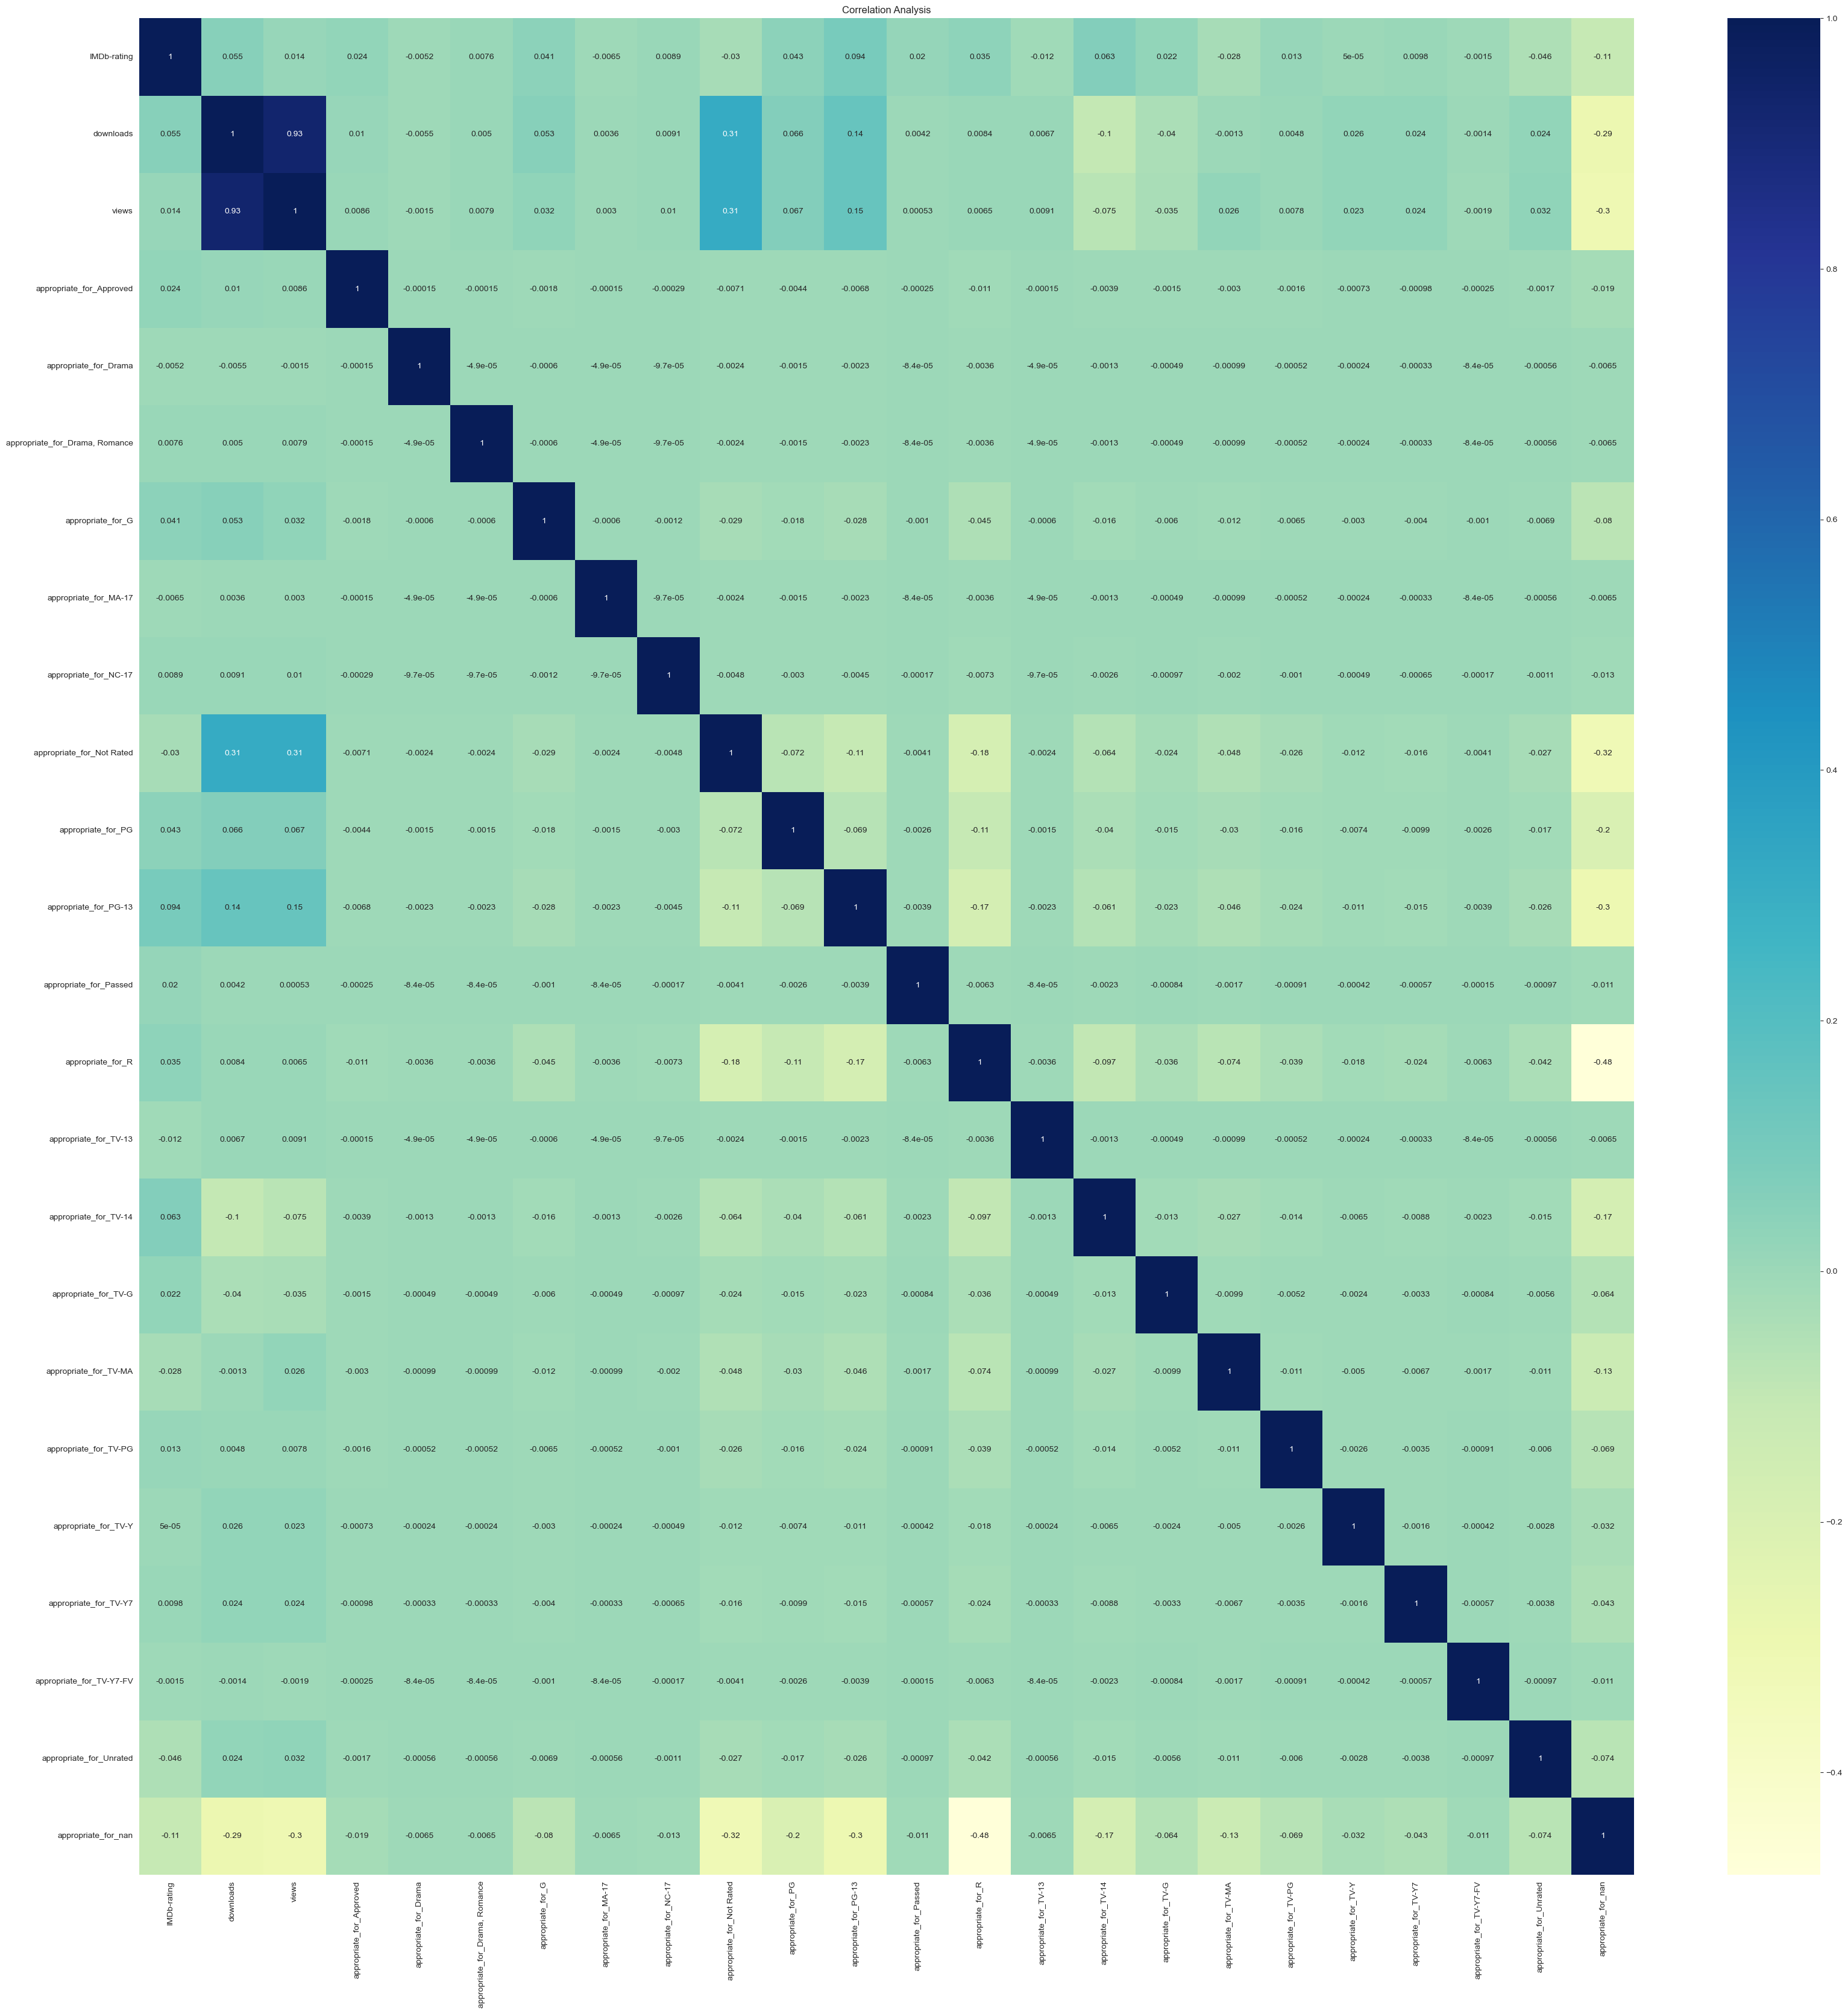

In [57]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_coded.corr(method='spearman'), cmap='YlGnBu', annot=True)
plt.title('Correlation Analysis')

In [58]:
mov_data_attr_corr = data
for i in range(len(mov_data_attr_corr)):
    if mov_data_attr_corr['appropriate_for'].iloc[i] is NA:
        rate = mov_data_attr_corr['IMDb-rating'].iloc[i]
        dist = []
        for j in range(len(df1)):
            dist.append(abs(df1.iloc[j]['avg']-rate))
        idx = dist.index(min(dist))
        mov_data_attr_corr['appropriate_for'].iloc[i] = df1.index[idx]
mov_data_attr_corr['appropriate_for'].value_counts()

C:\Users\周飞宇\AppData\Local\Temp\ipykernel_27540\3613318840.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_data_attr_corr['appropriate_for'].iloc[i] = df1.index[idx]


R                 4384
PureBasic         4108
CoffeeScript      2811
Not Rated         2142
PG-13             1968
ActionScript      1427
SourcePawn        1113
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Gherkin             17
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64